<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns            #Statistical Data Visualization
import warnings

%pylab inline

warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

In [4]:
iris = pd.read_csv('../donnees/Iris.csv').iloc[:,1:]
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
df = iris

df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()
df[['sepal length in cm','sepal width in cm',
     'petal length in cm','petal width in cm']].head()

sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm  
0                0.2  
1                0.2  
2                0.2  
3                0.2  
4                0.2

In [6]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,[0,1,2,3]].values
y = df.loc[:,'class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

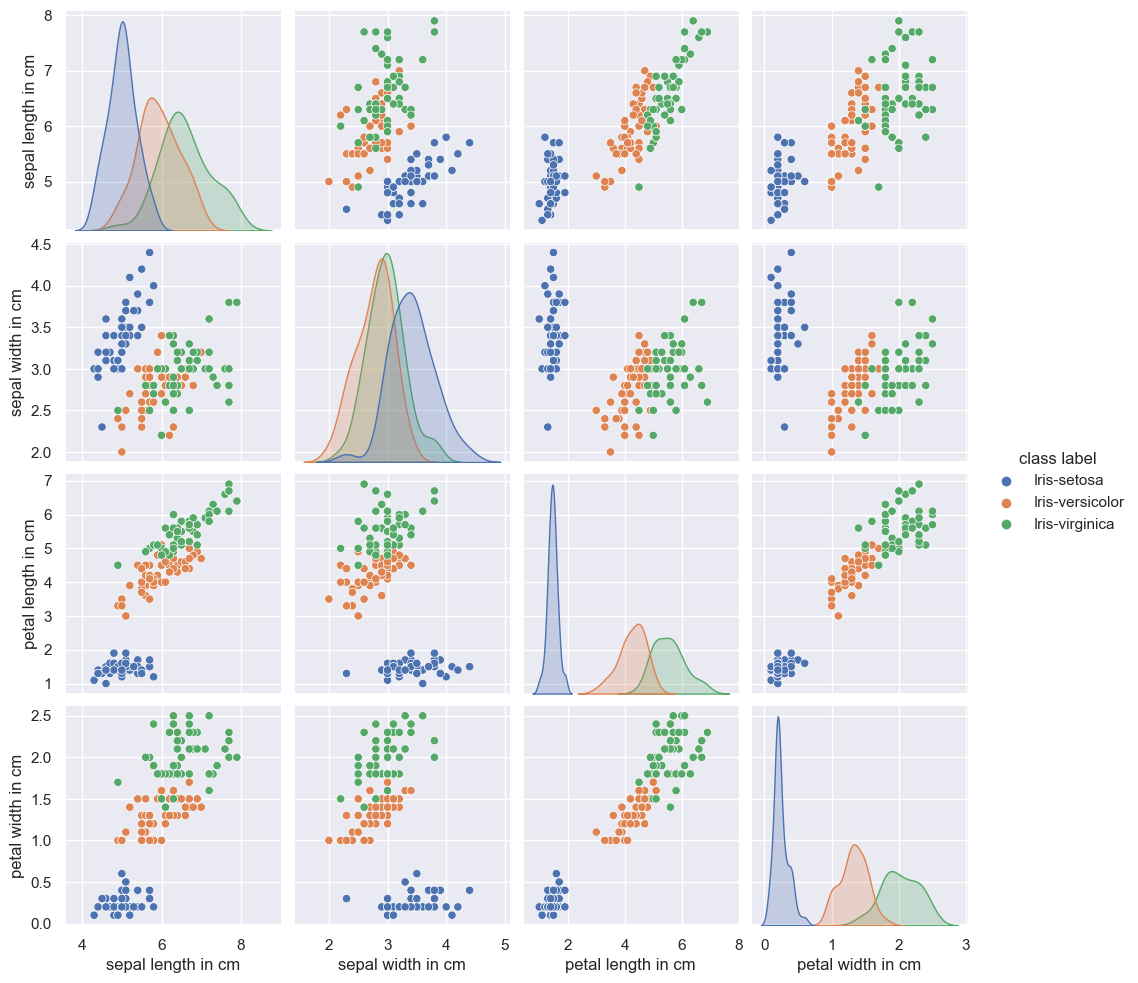

In [7]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue='class label', size=2.5);

For n_clusters = 2 The average silhouette_score is : 0.6808136202936816


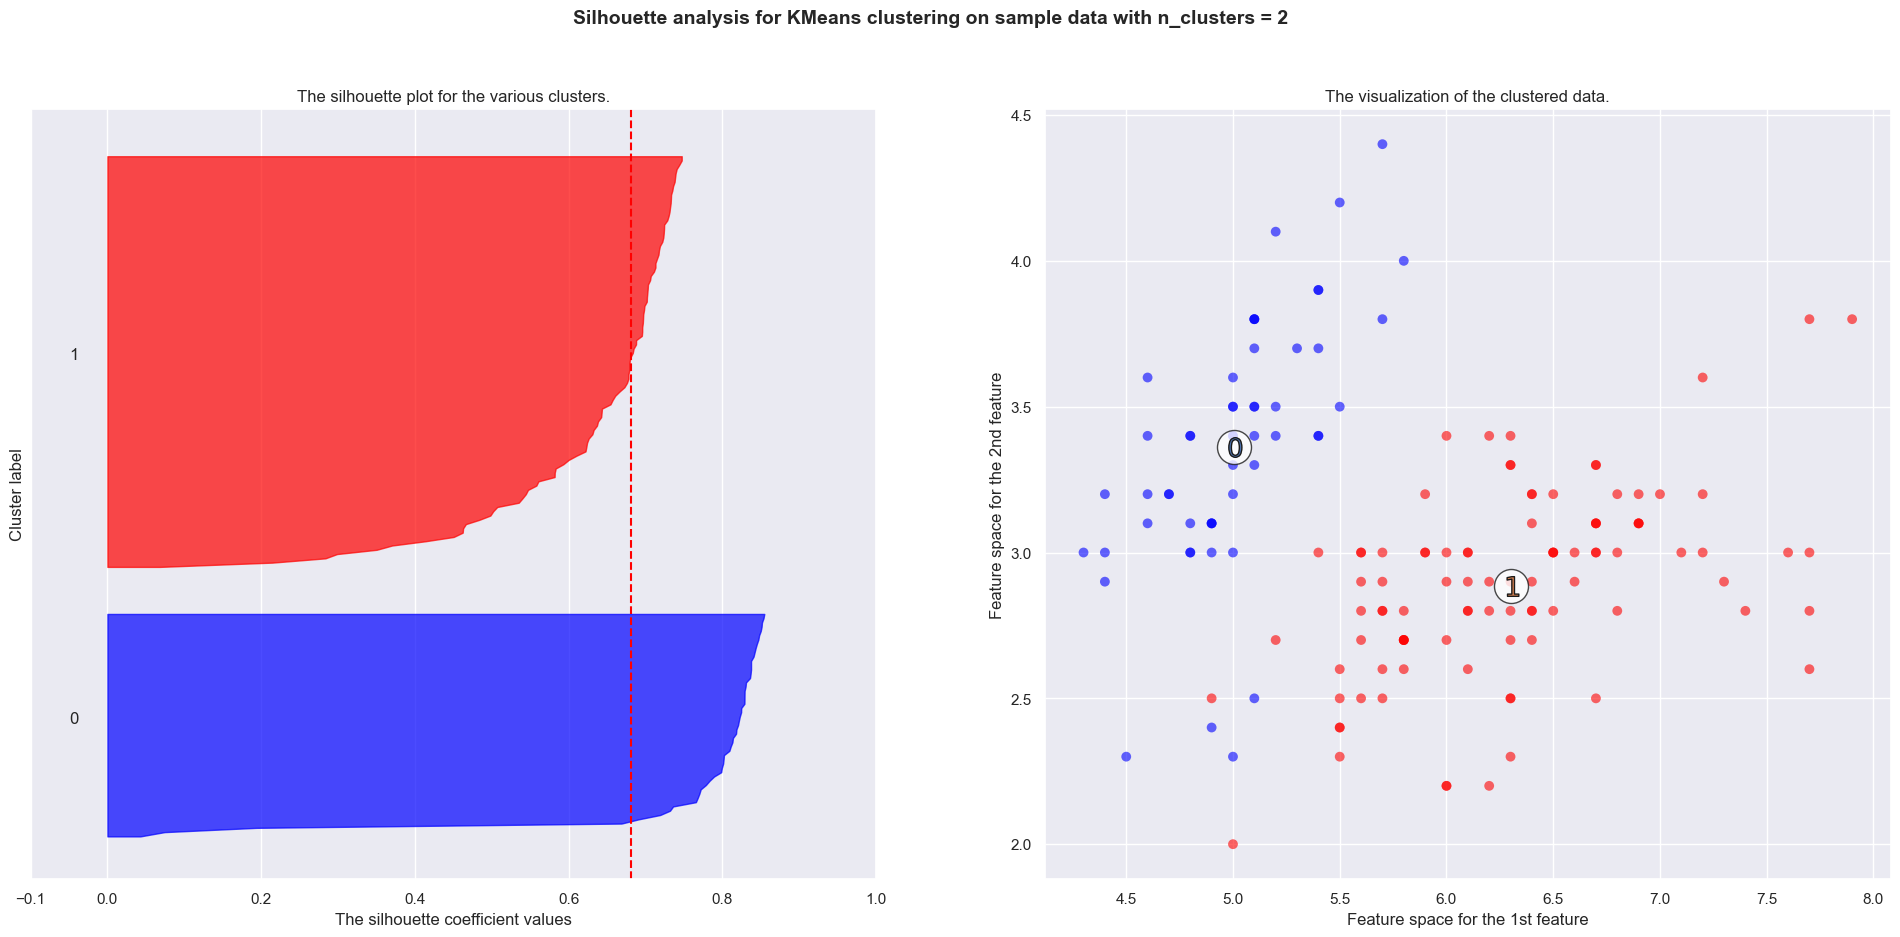

For n_clusters = 3 The average silhouette_score is : 0.5525919445499757


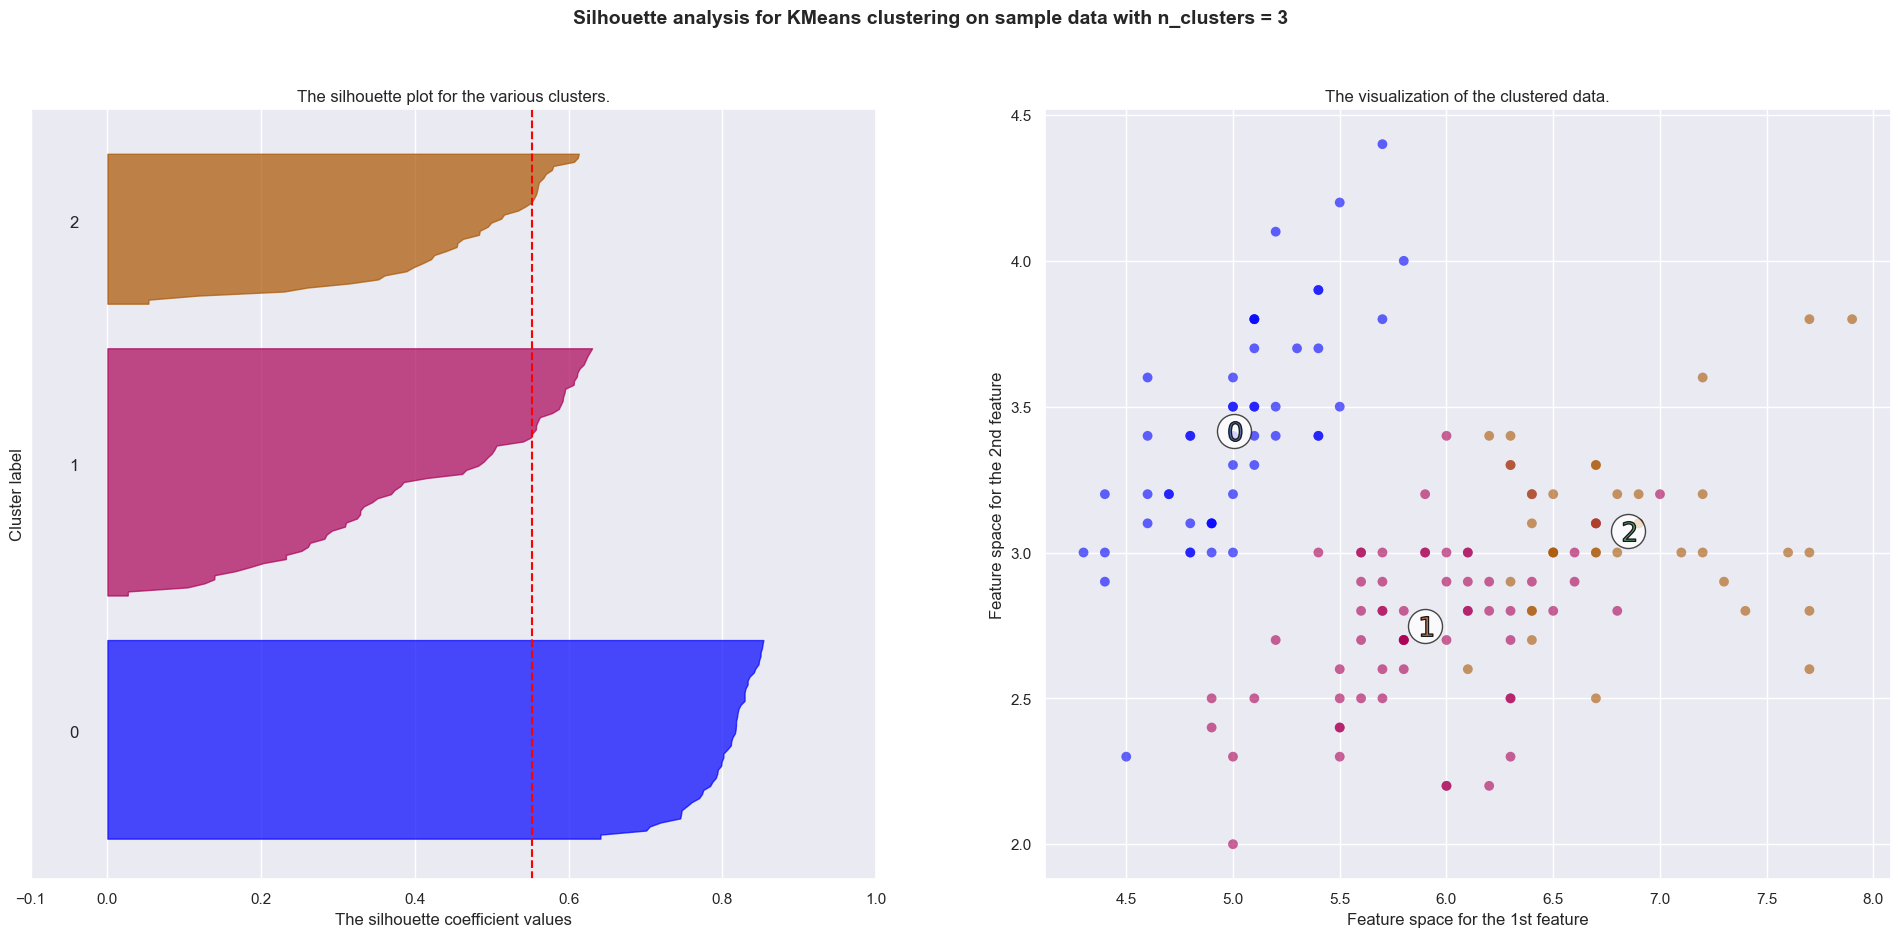

For n_clusters = 4 The average silhouette_score is : 0.4978256901095472


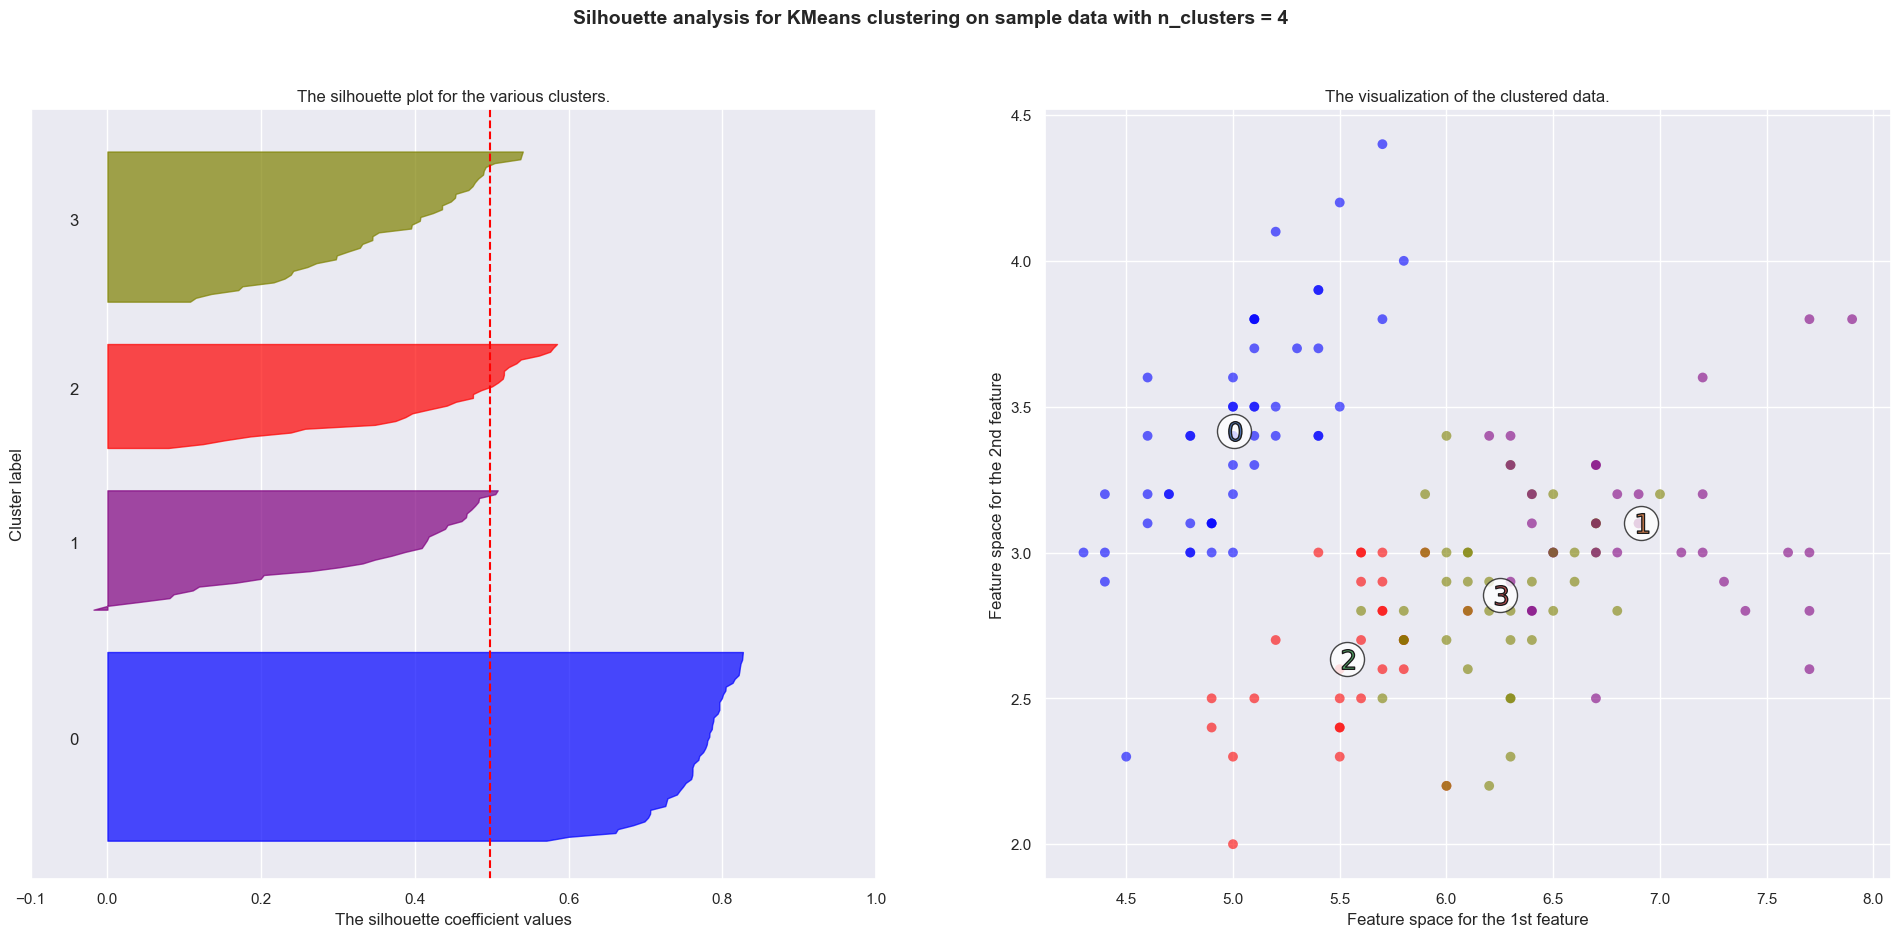

For n_clusters = 5 The average silhouette_score is : 0.4885175508886279


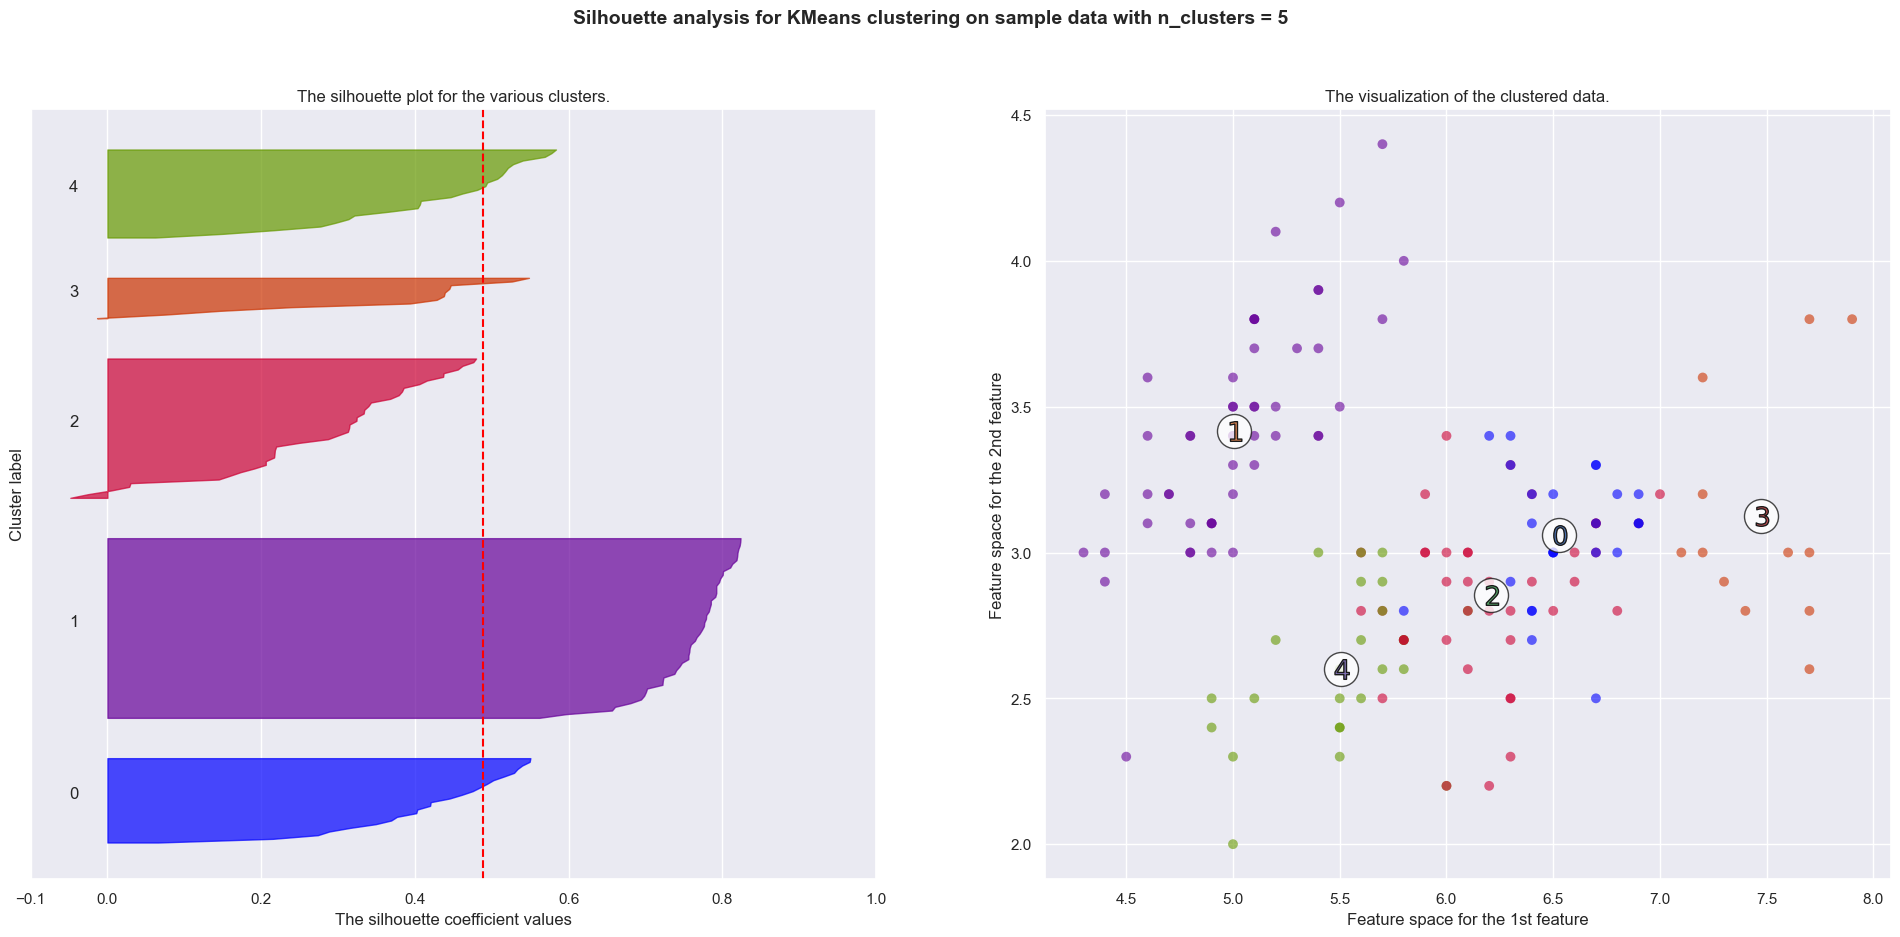

For n_clusters = 6 The average silhouette_score is : 0.37121805054590085


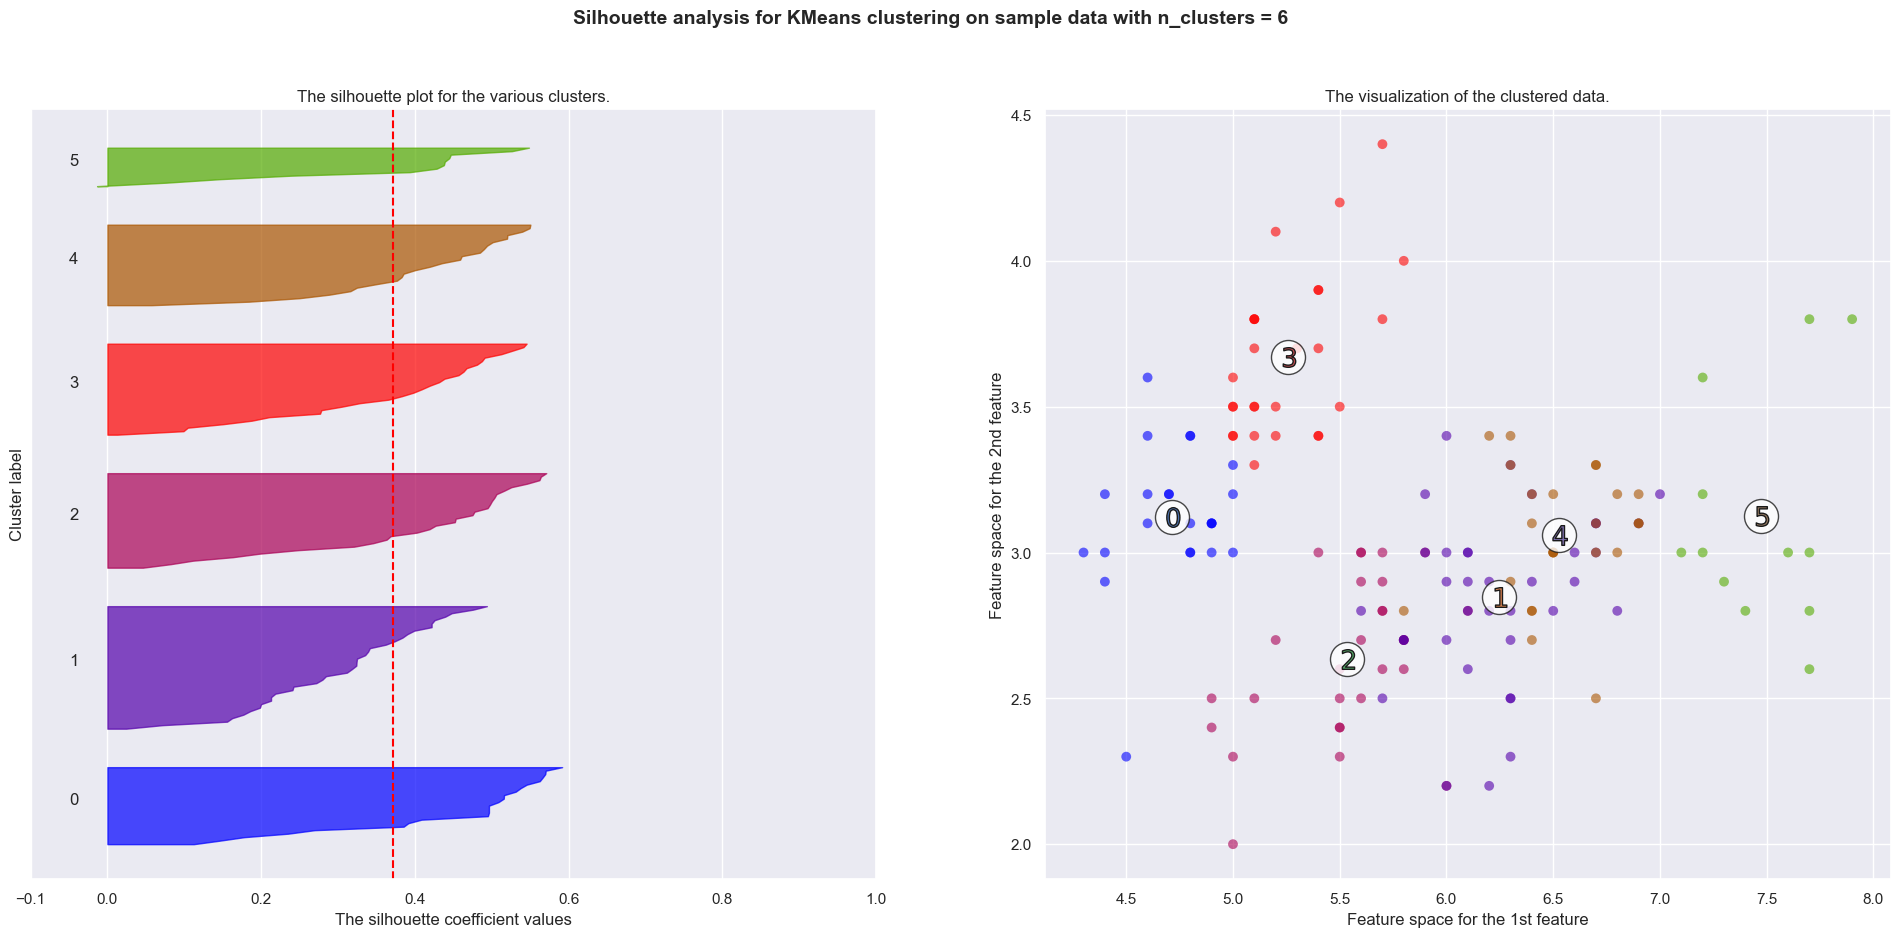

For n_clusters = 7 The average silhouette_score is : 0.3600597997328459


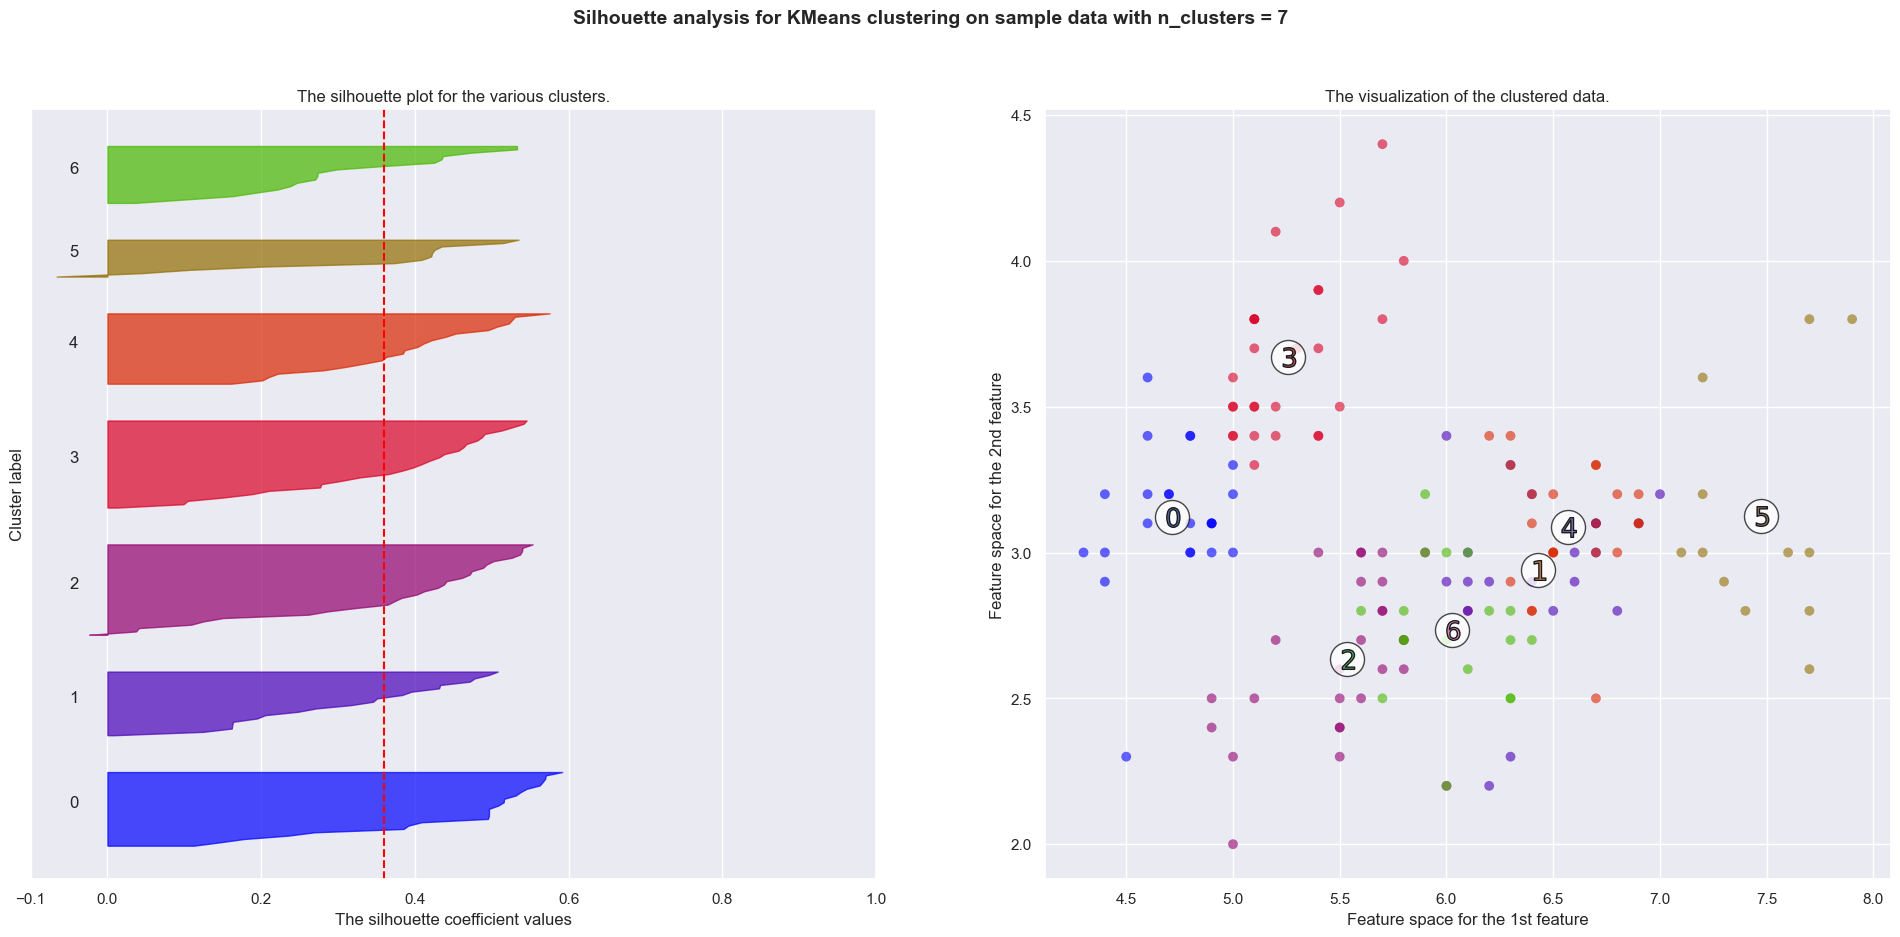

For n_clusters = 8 The average silhouette_score is : 0.3603749708042153


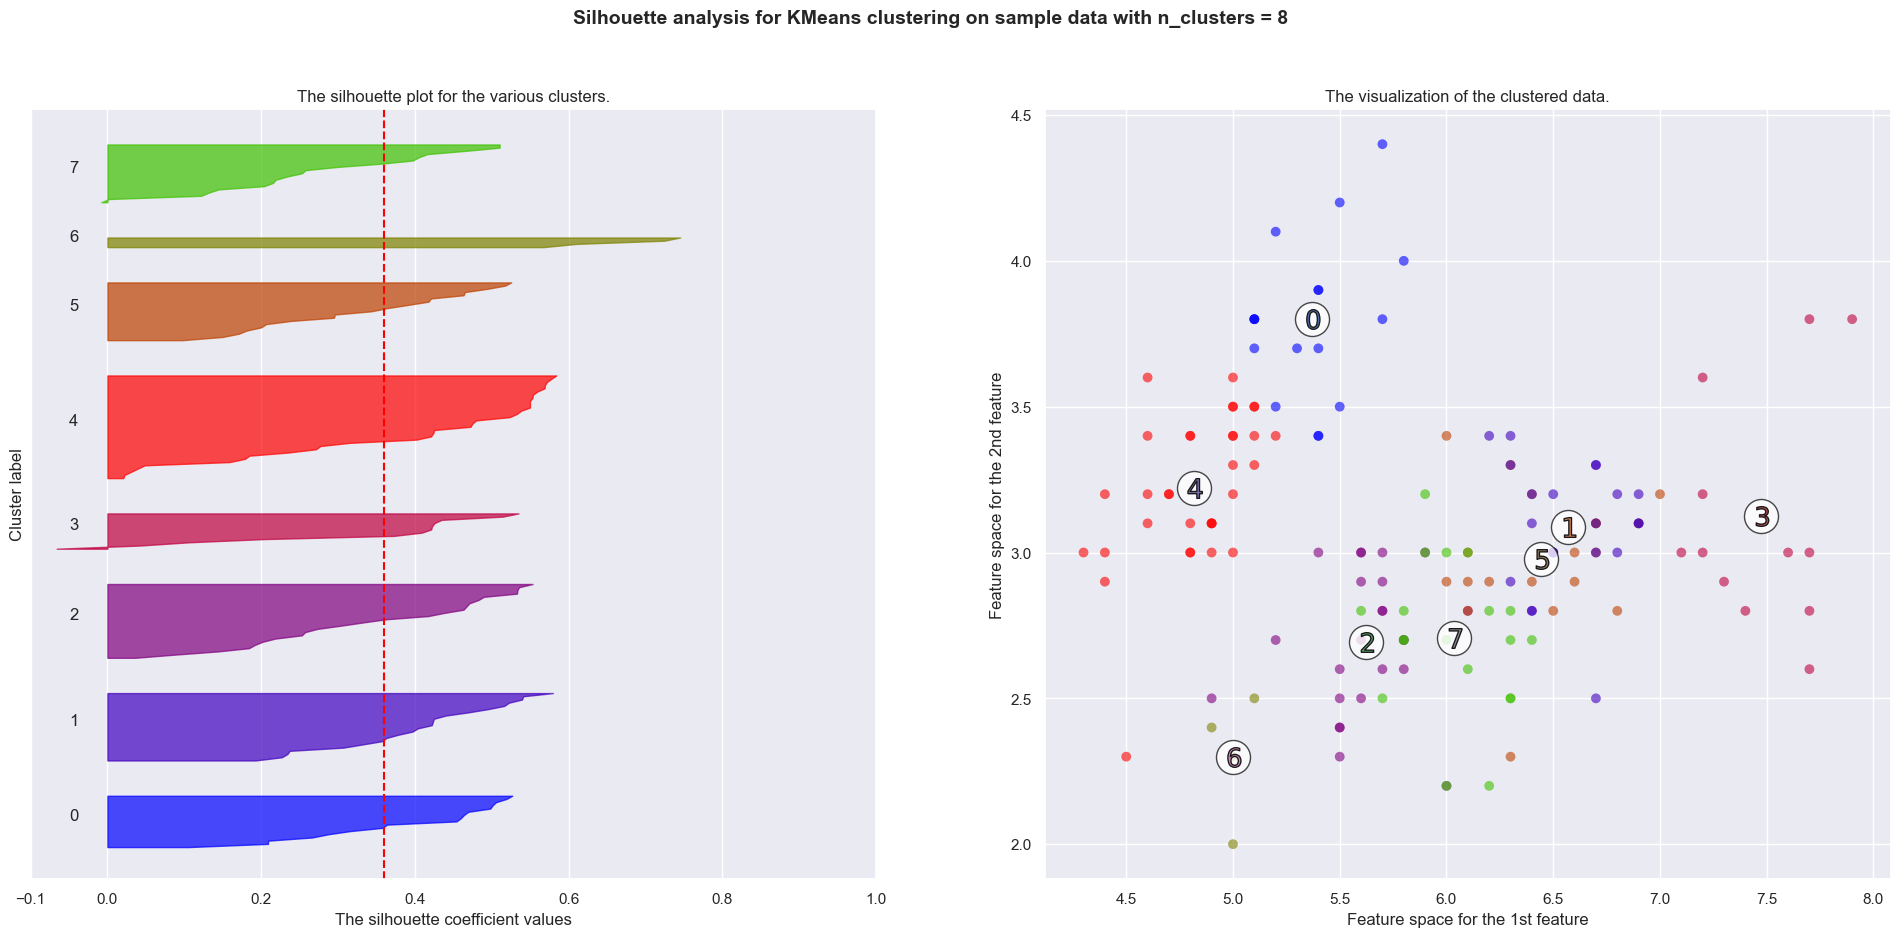

For n_clusters = 9 The average silhouette_score is : 0.3139310239112048


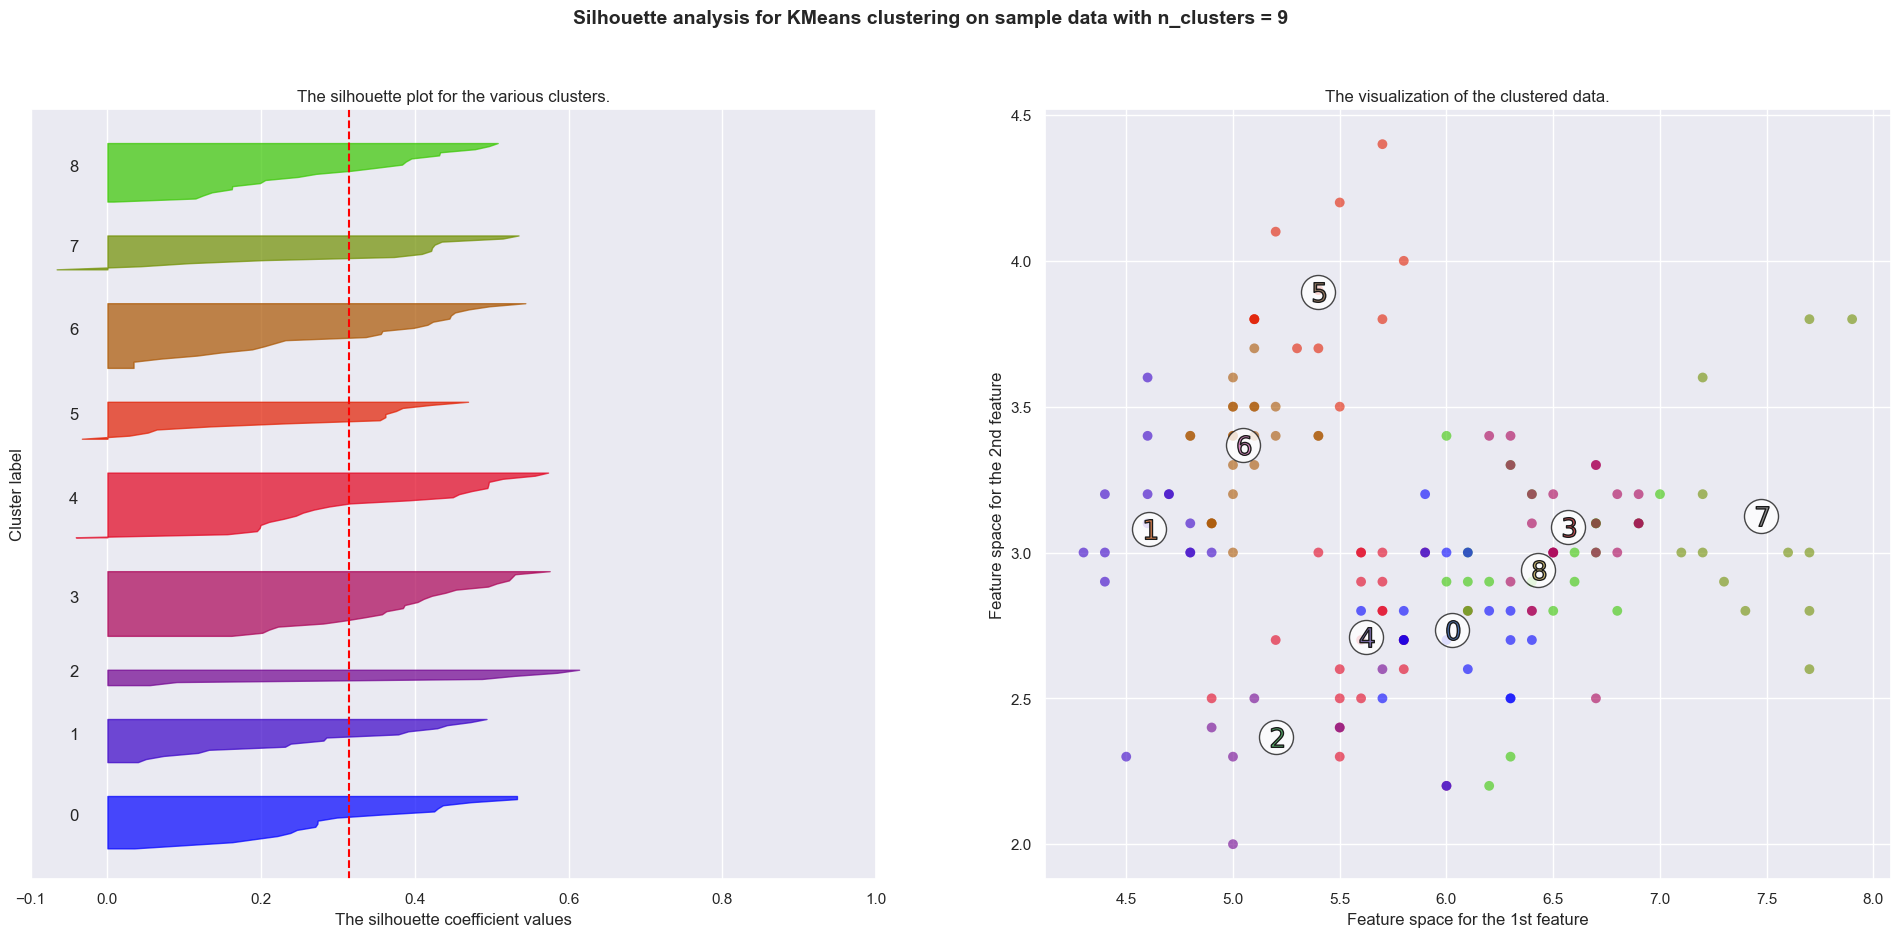

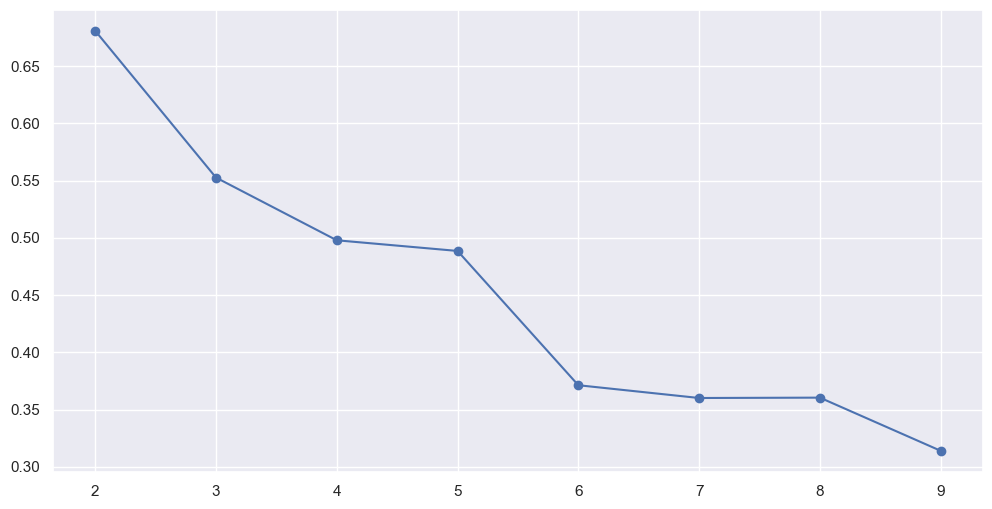

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = df.iloc[:,[0,1,2,3]].values


cmap = cm.get_cmap("brg")
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

silhouettes = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(24, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouettes.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i       
        
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters )

    dim1, dim2 = 0,1
    
    ax2.scatter(X[:, dim1], X[:, dim2], marker='.', s=200, lw=0, alpha=0.6,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, dim1], centers[:, dim2], marker='o',
                c="white", alpha=.8, s=600, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[dim1], c[dim2], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
plt.figure(figsize=(12,6))
plt.plot(range_n_clusters,silhouettes,marker='o')
plt.show()

In [9]:
from sklearn.preprocessing import scale
df.iloc[:,[0,1,2,3]] = scale(df.iloc[:,[0,1,2,3]])

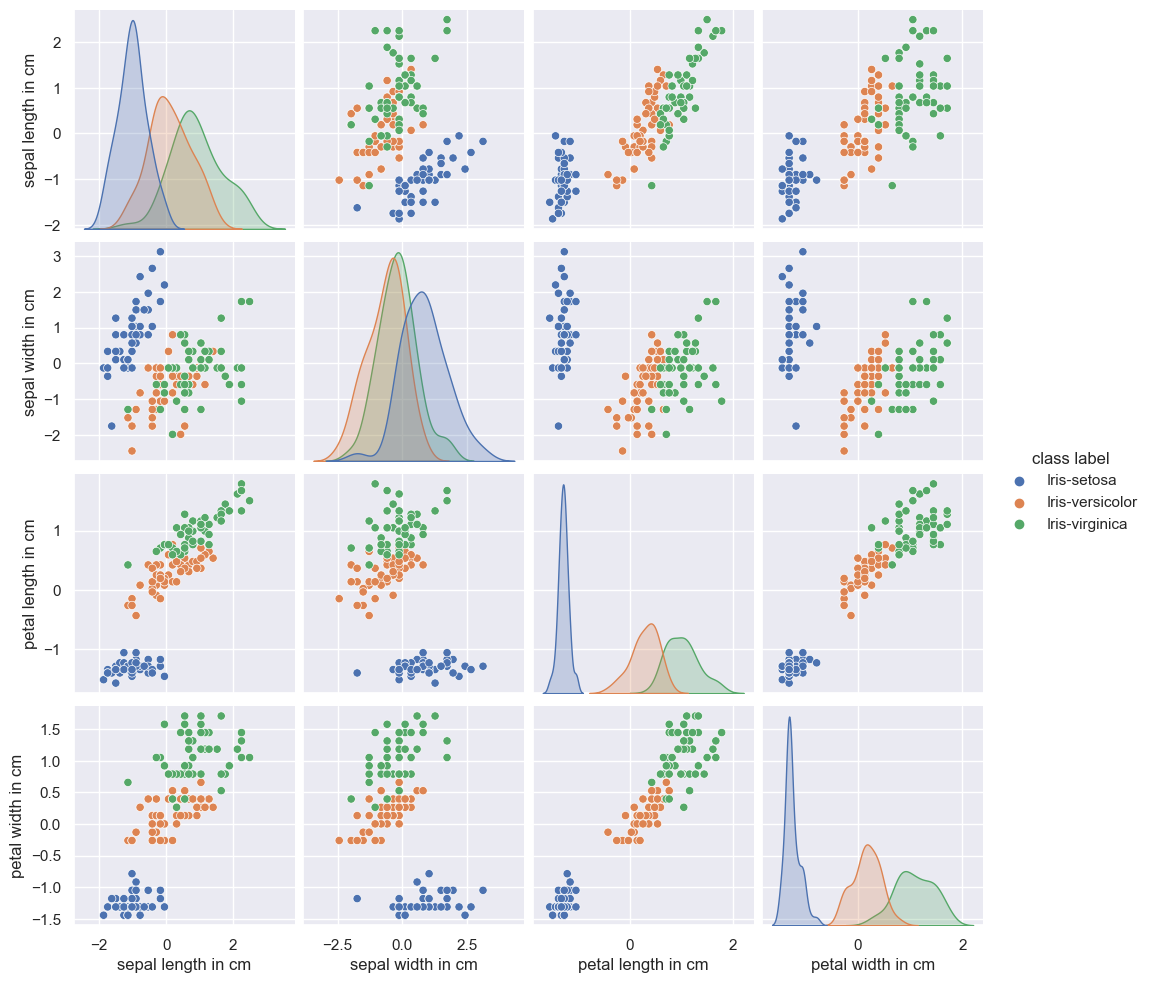

In [10]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue='class label', size=2.5);

For n_clusters = 2 The average silhouette_score is : 0.580184463257396


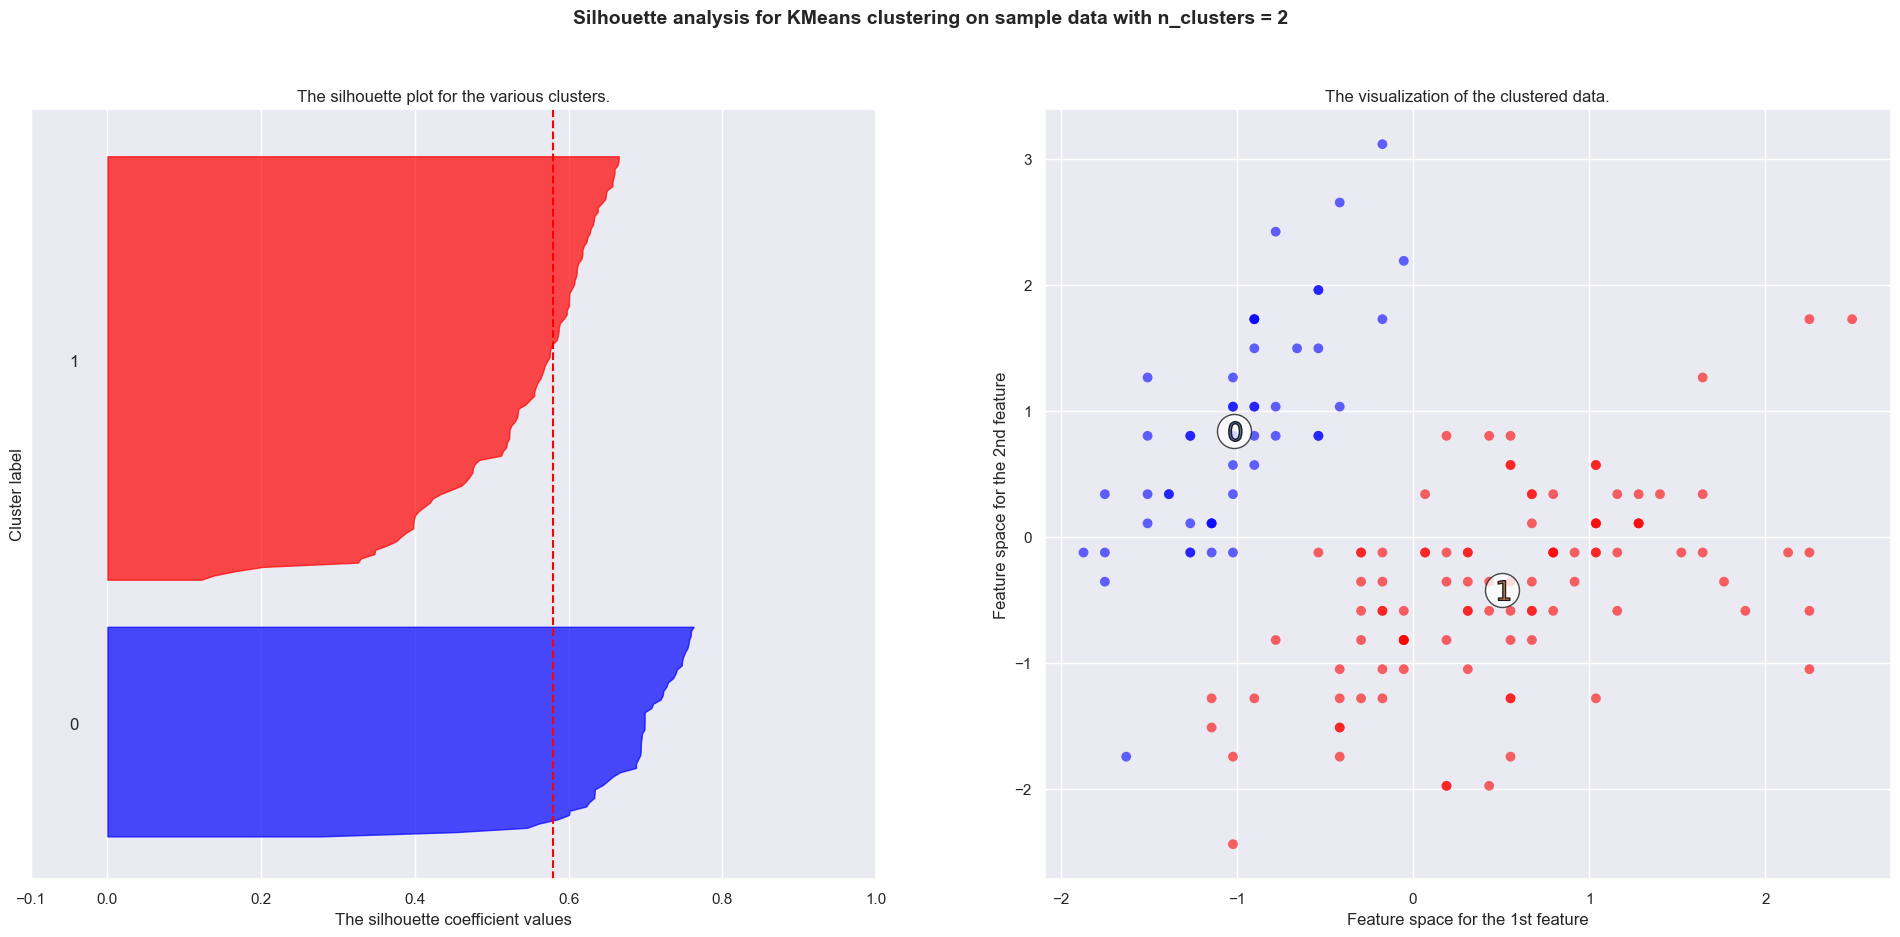

For n_clusters = 3 The average silhouette_score is : 0.46214947389312017


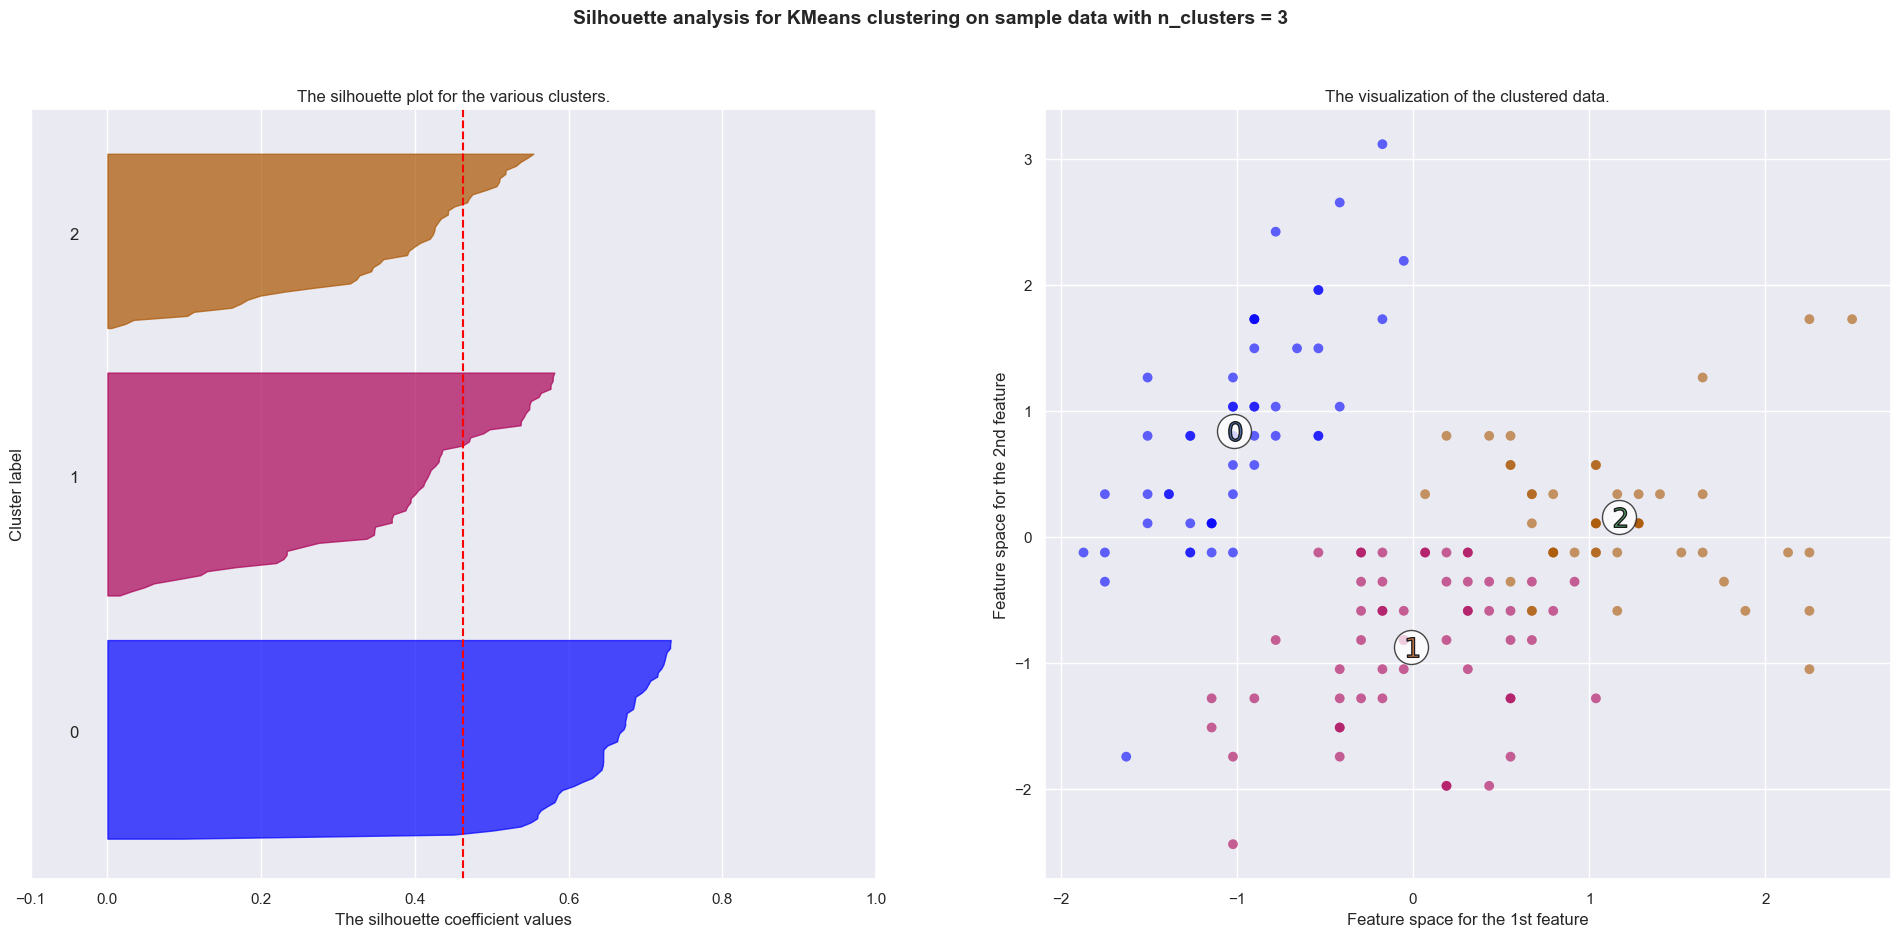

For n_clusters = 4 The average silhouette_score is : 0.38686030299599405


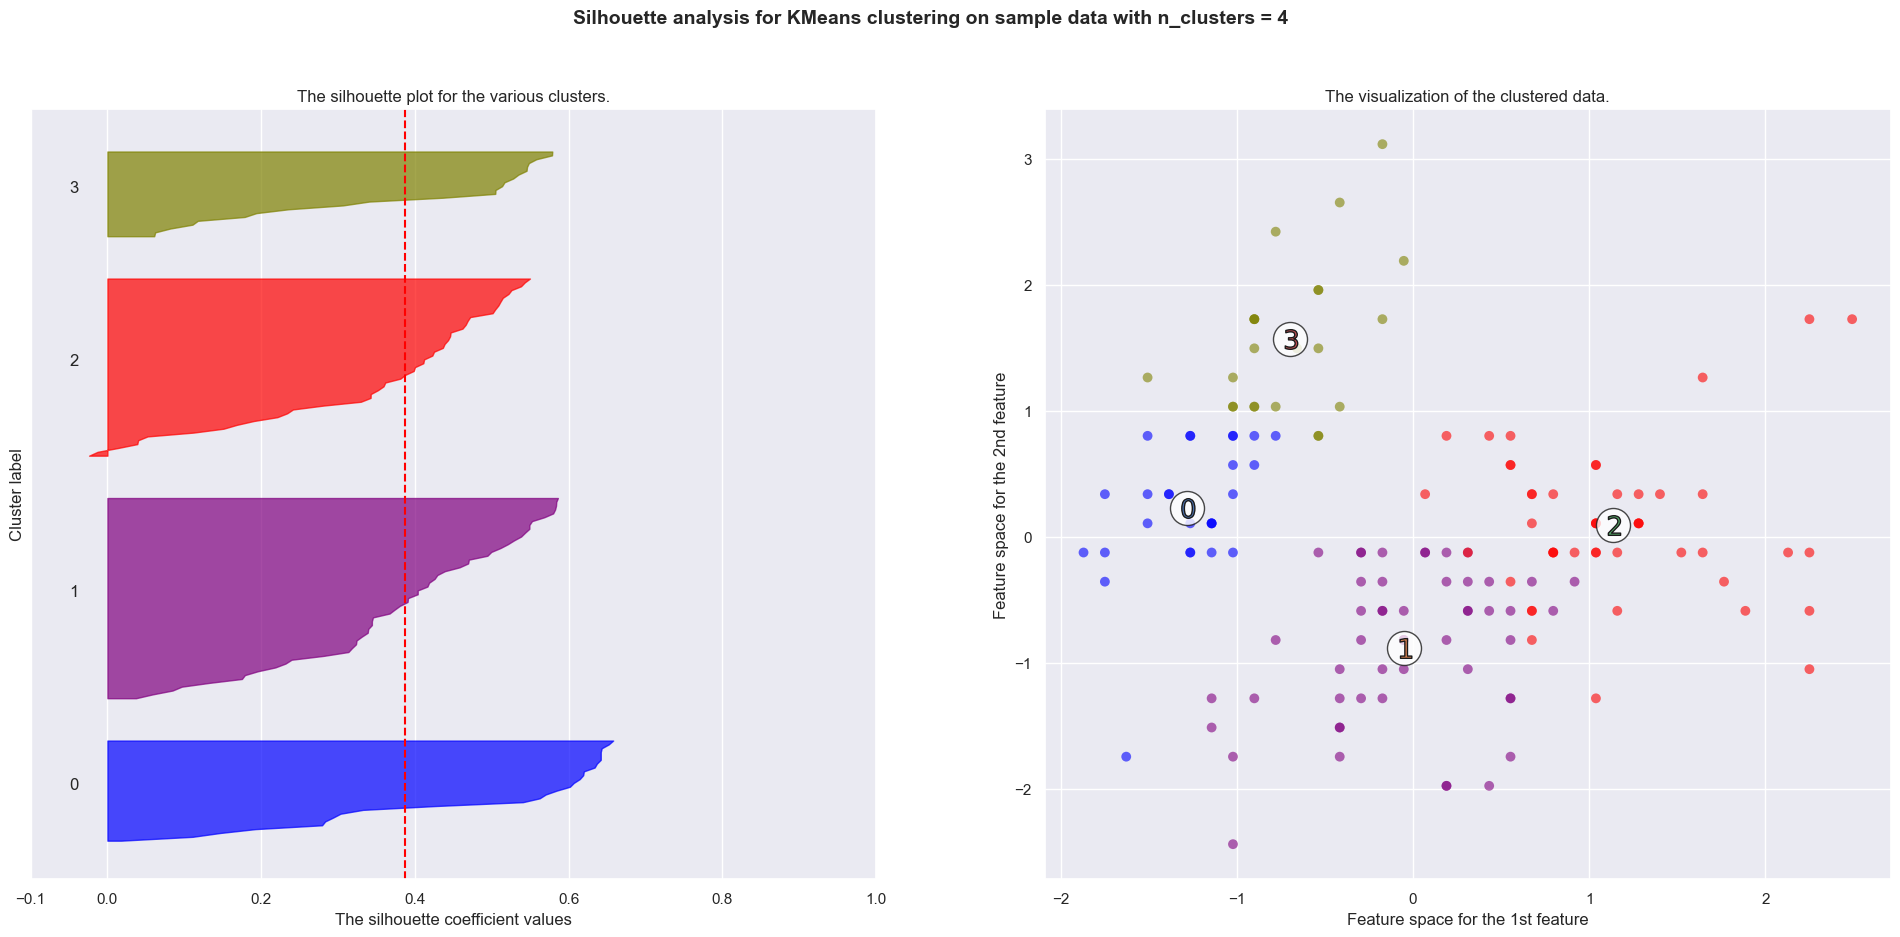

For n_clusters = 5 The average silhouette_score is : 0.34478573455929096


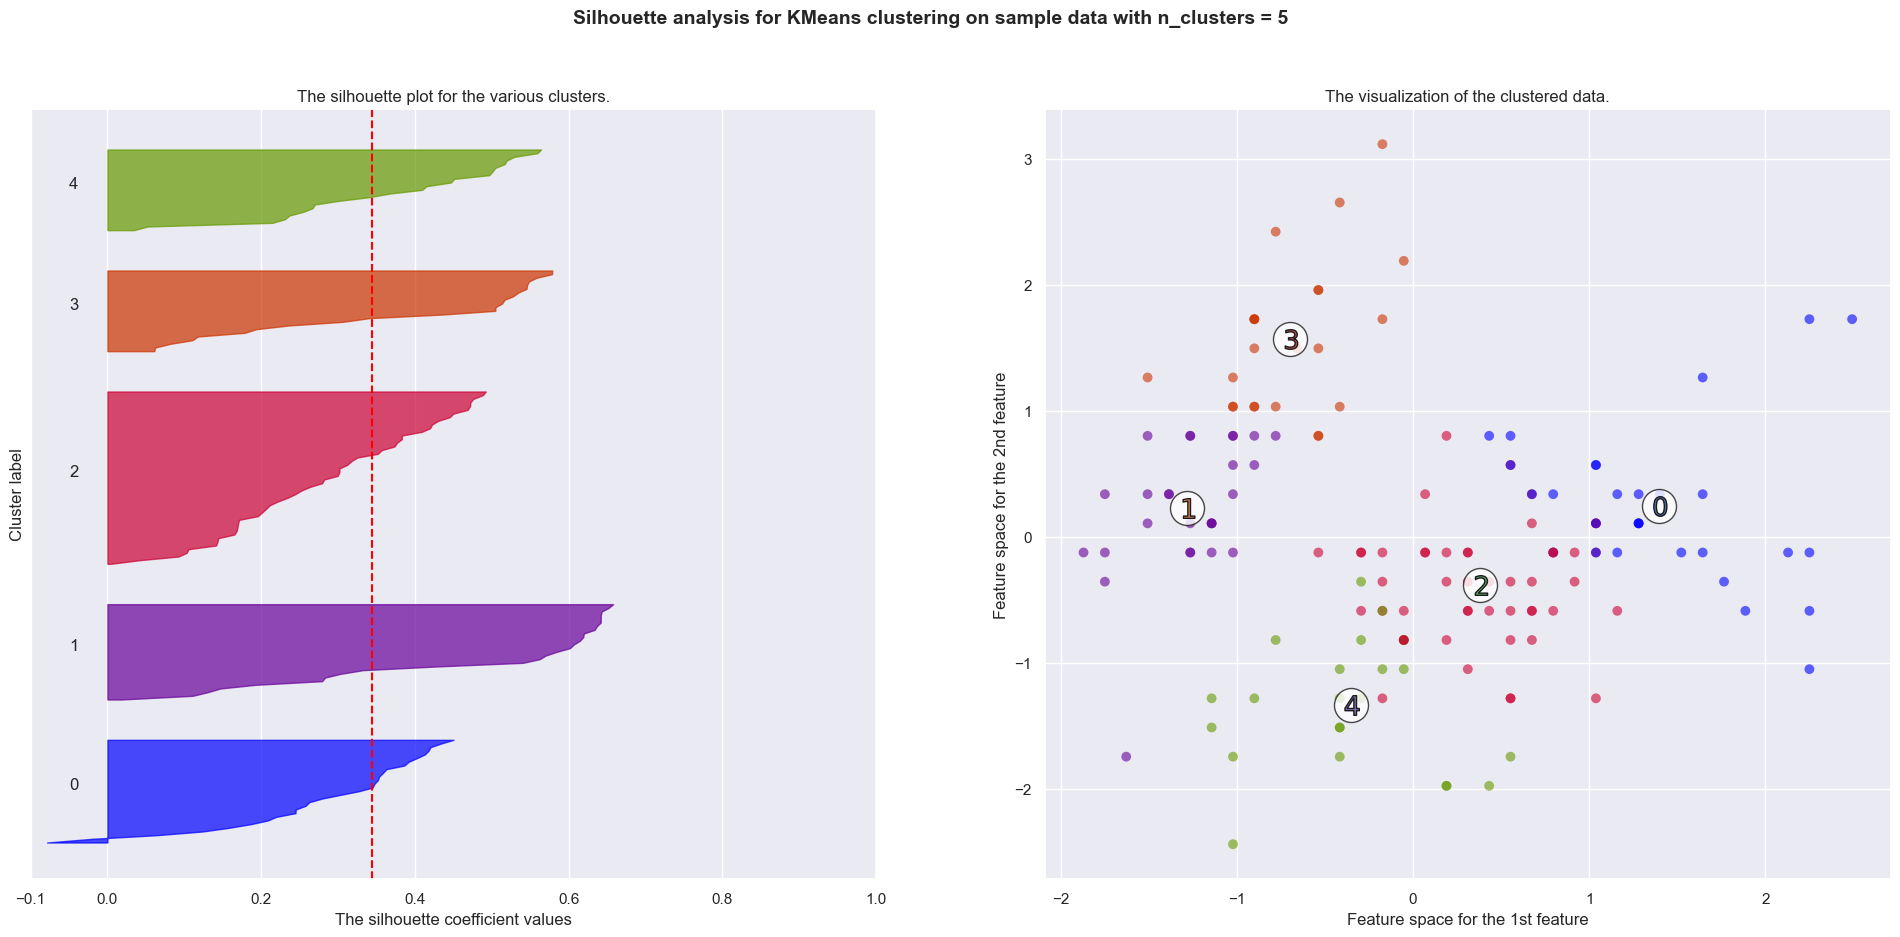

For n_clusters = 6 The average silhouette_score is : 0.3259365058730077


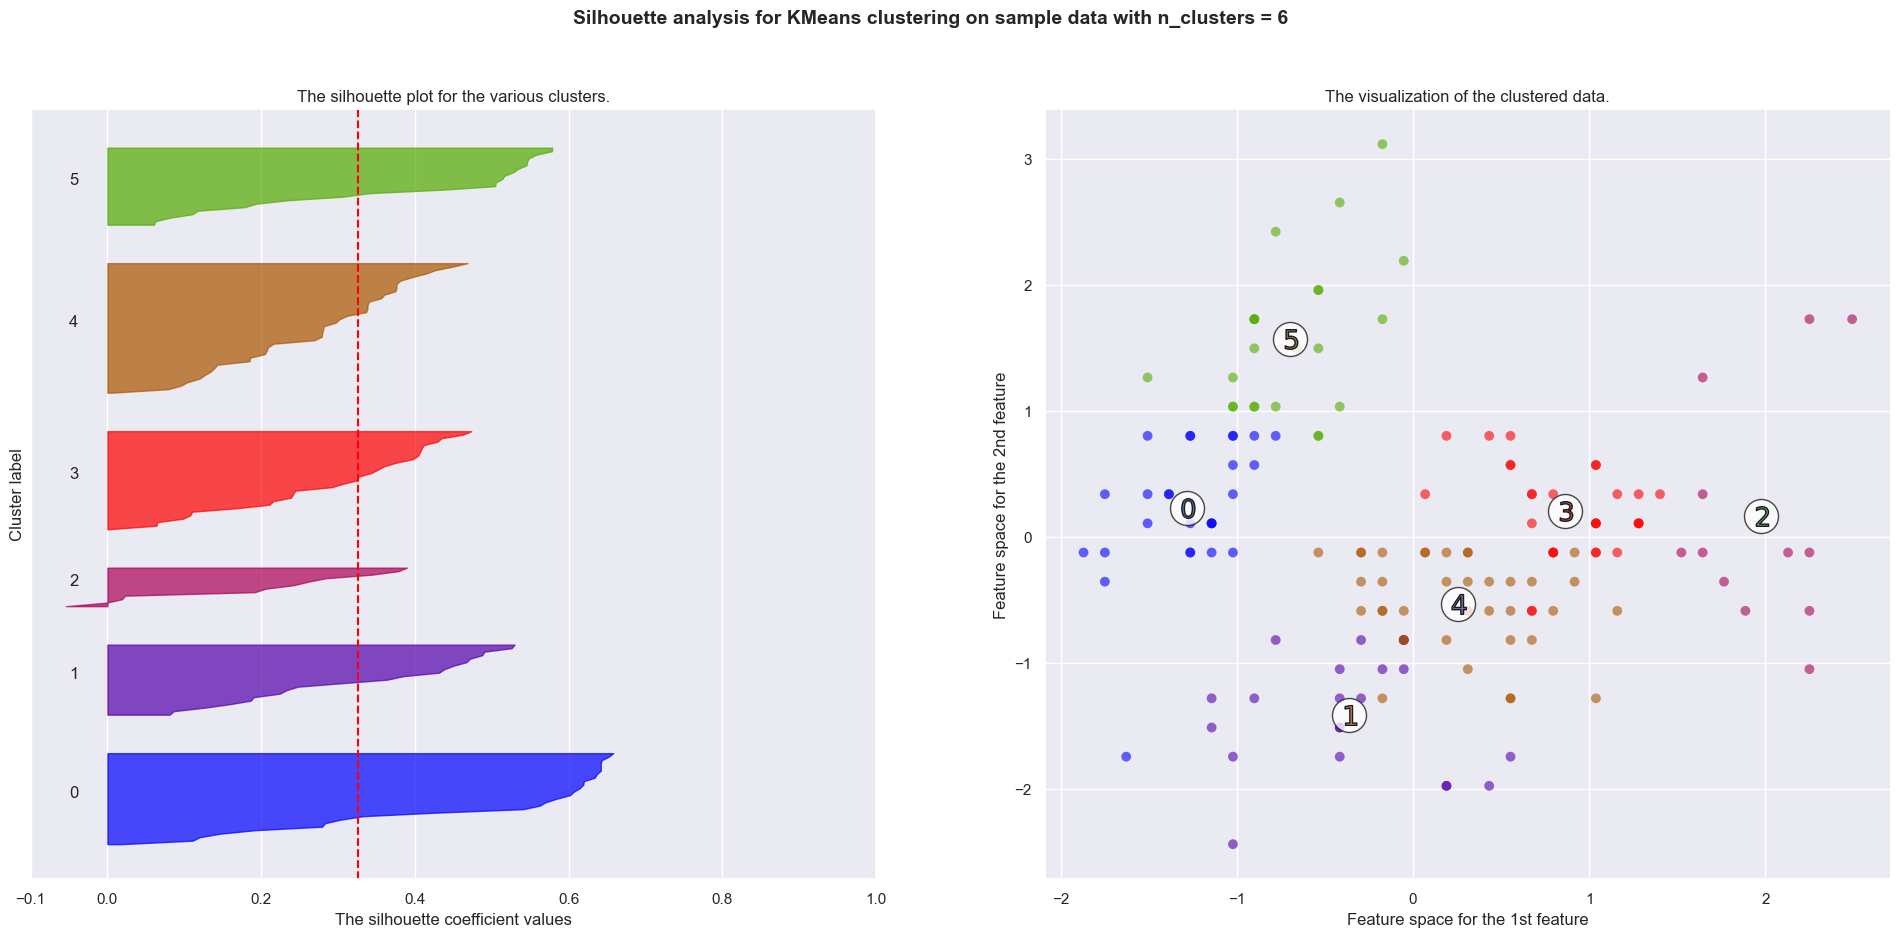

For n_clusters = 7 The average silhouette_score is : 0.3346062225960434


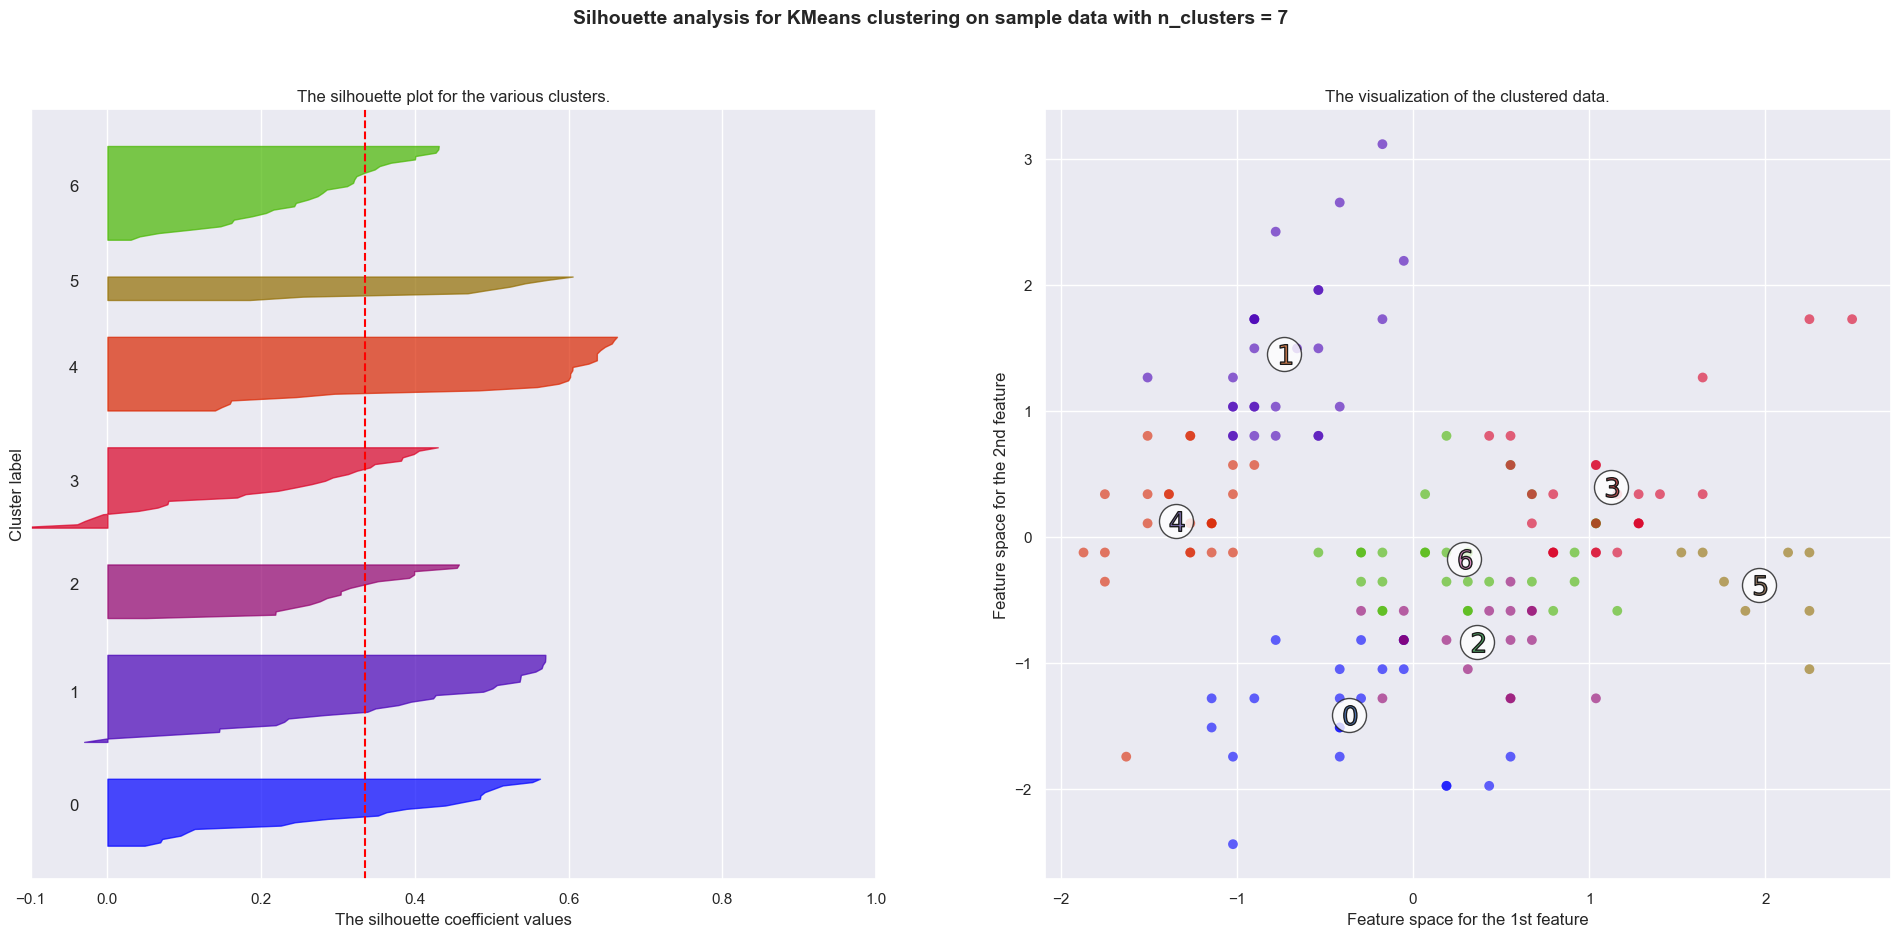

For n_clusters = 8 The average silhouette_score is : 0.33078126678251085


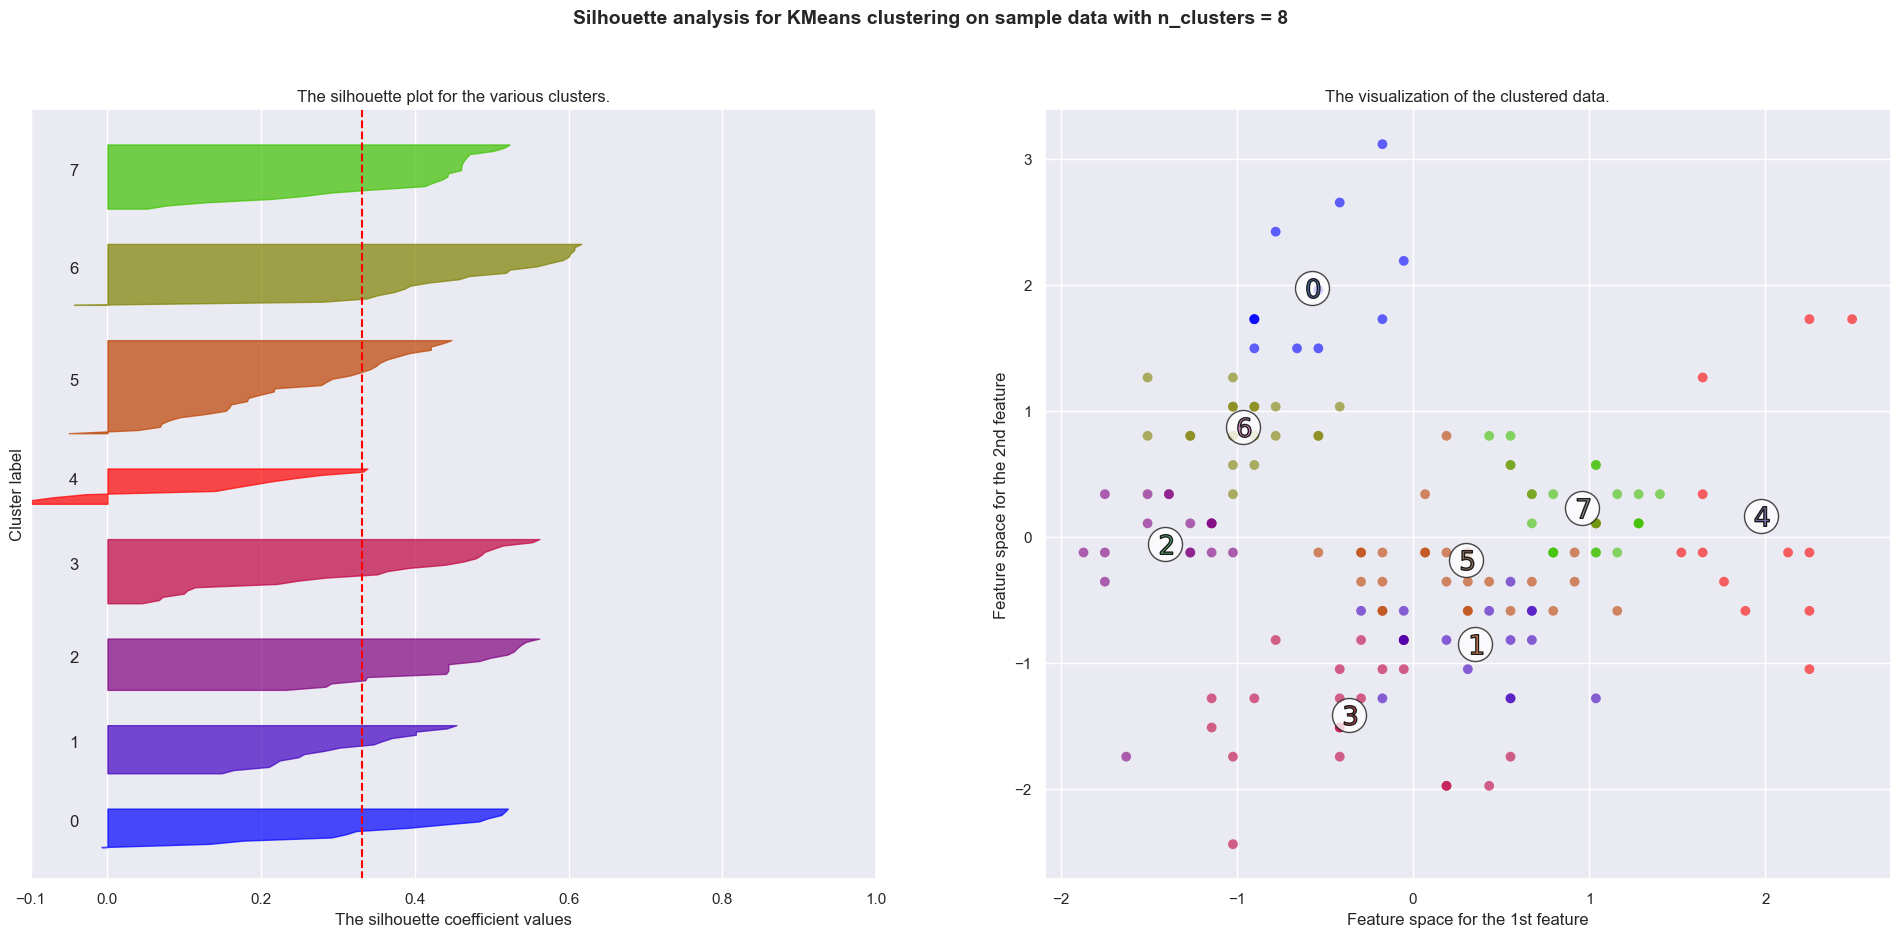

For n_clusters = 9 The average silhouette_score is : 0.327772173961027


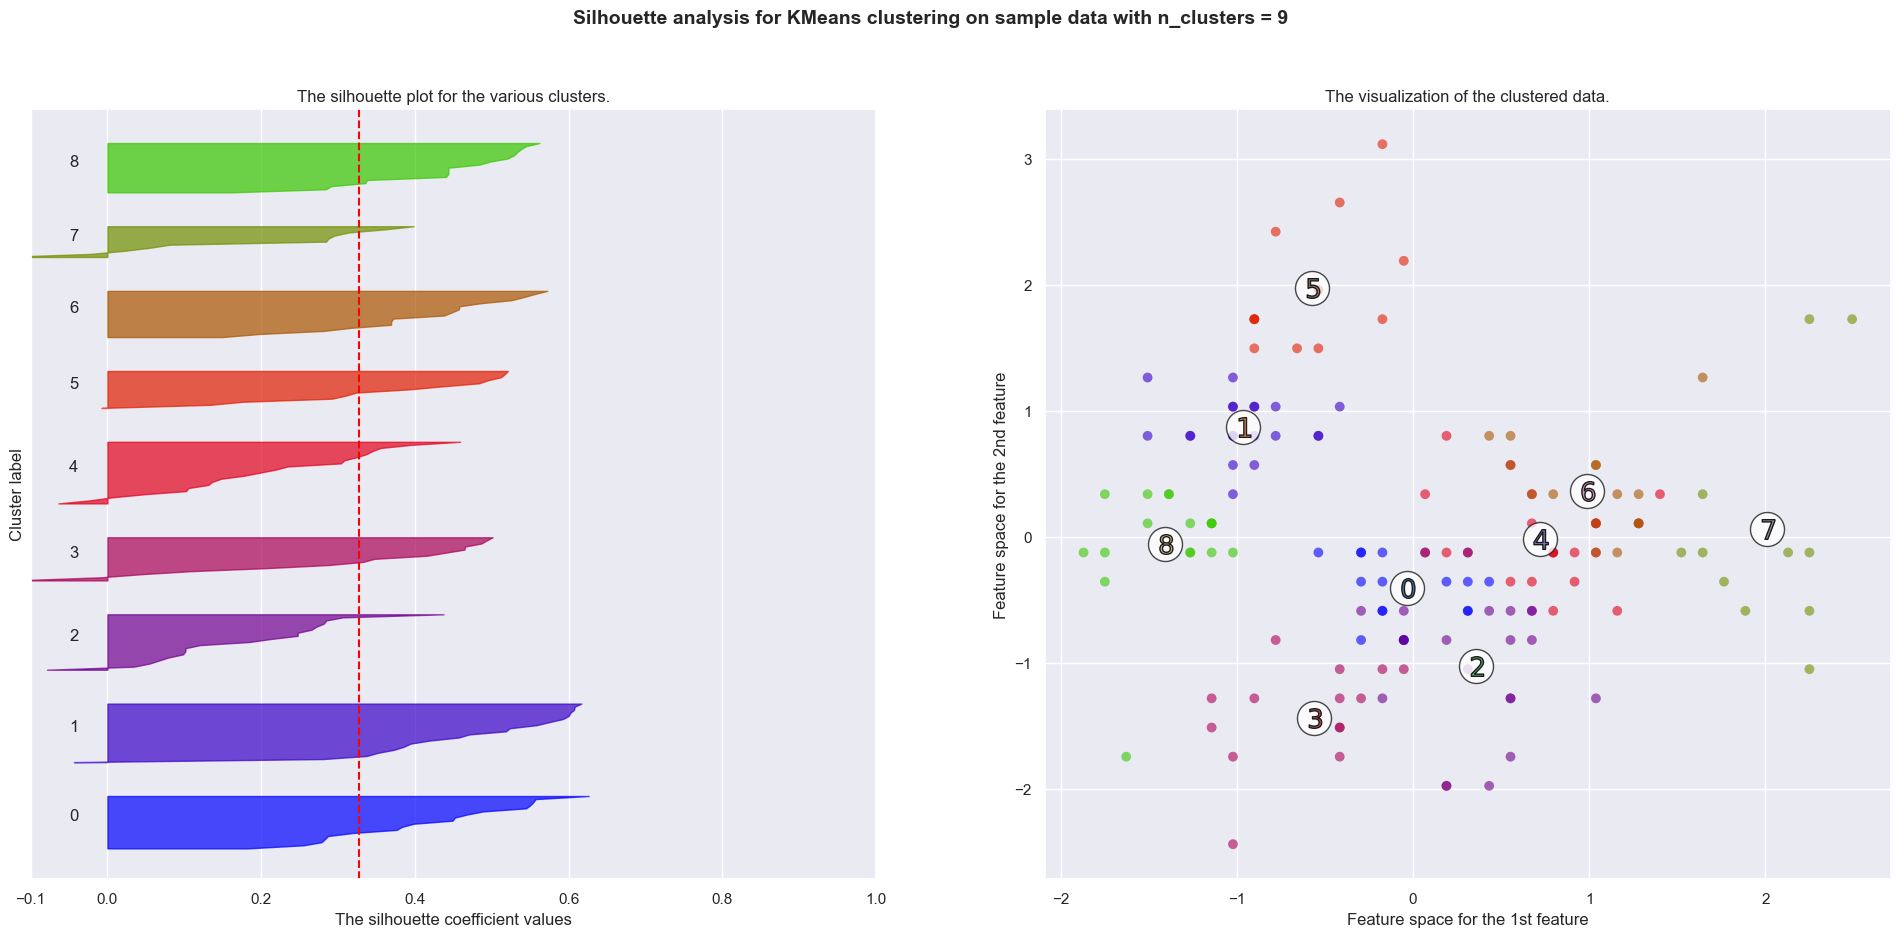

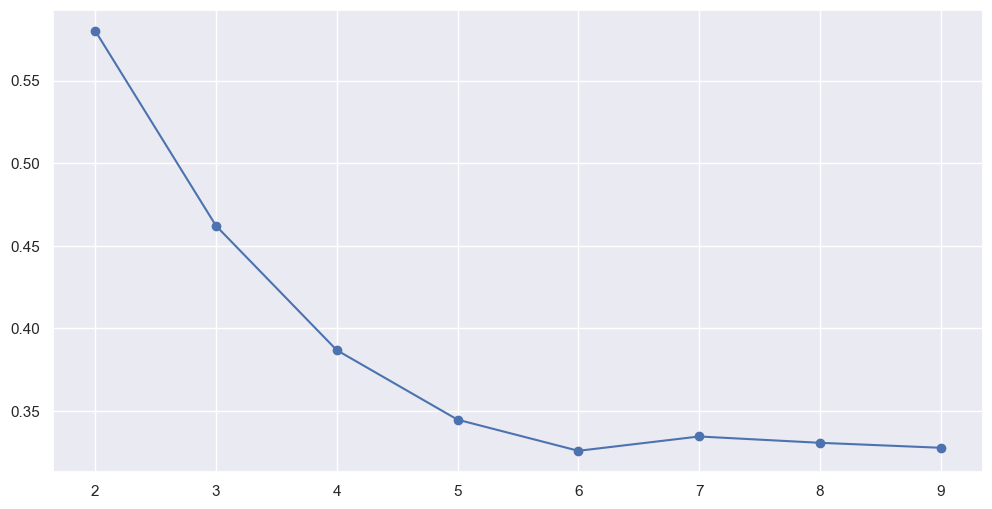

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = df.iloc[:,[0,1,2,3]].values


cmap = cm.get_cmap("brg")
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

silhouettes = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(24, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouettes.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i       
        
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters )

    dim1, dim2 = 0,1
    
    ax2.scatter(X[:, dim1], X[:, dim2], marker='.', s=200, lw=0, alpha=0.6,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, dim1], centers[:, dim2], marker='o',
                c="white", alpha=.8, s=600, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[dim1], c[dim2], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
plt.figure(figsize=(12,6))
plt.plot(range_n_clusters,silhouettes,marker='o')
plt.show()

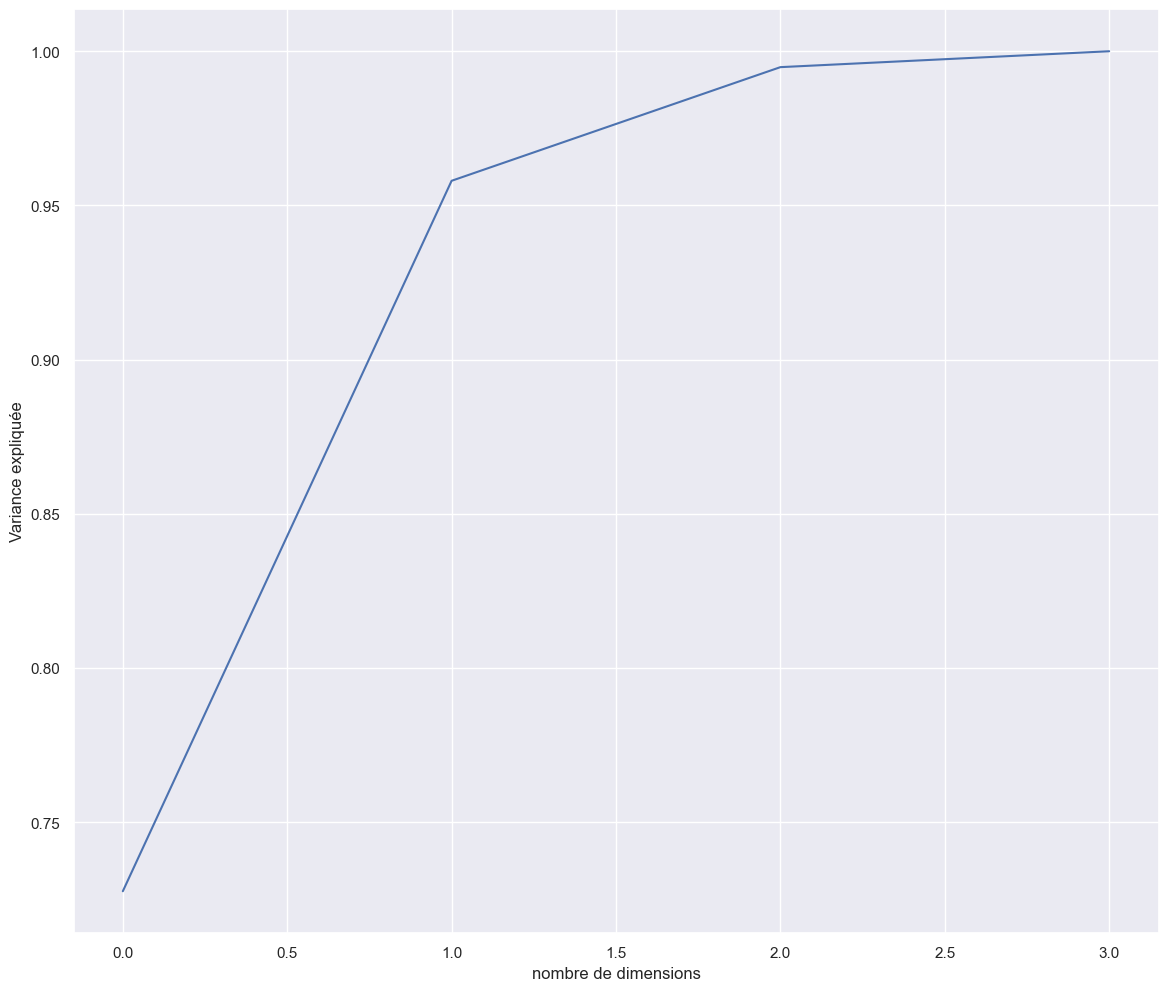

In [12]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.figure(figsize=(14,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de dimensions')
plt.ylabel('Variance expliquée');

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_red = pca.fit(X).transform(X)
dfPCA = pd.DataFrame(data=x_red, columns=['Dim1', 'Dim2'])
dfPCA['class label']= df.loc[:,'class label']
dfPCA.head()

Dim1      Dim2  class label
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa

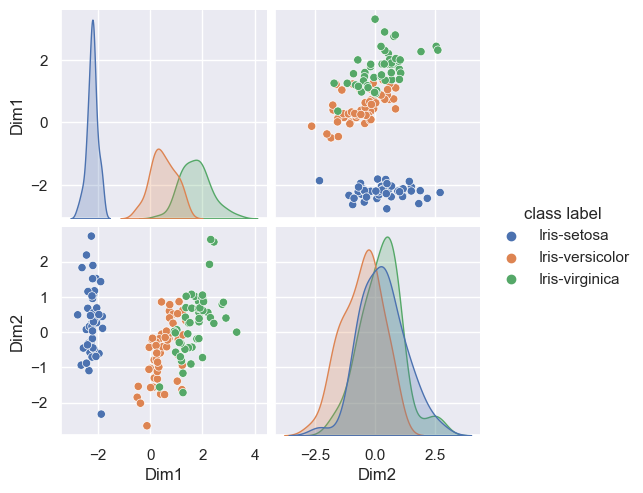

In [15]:
import seaborn as sns
sns.set()
sns.pairplot(dfPCA, hue='class label', size=2.5);

For n_clusters = 2 The average silhouette_score is : 0.6130367695437591


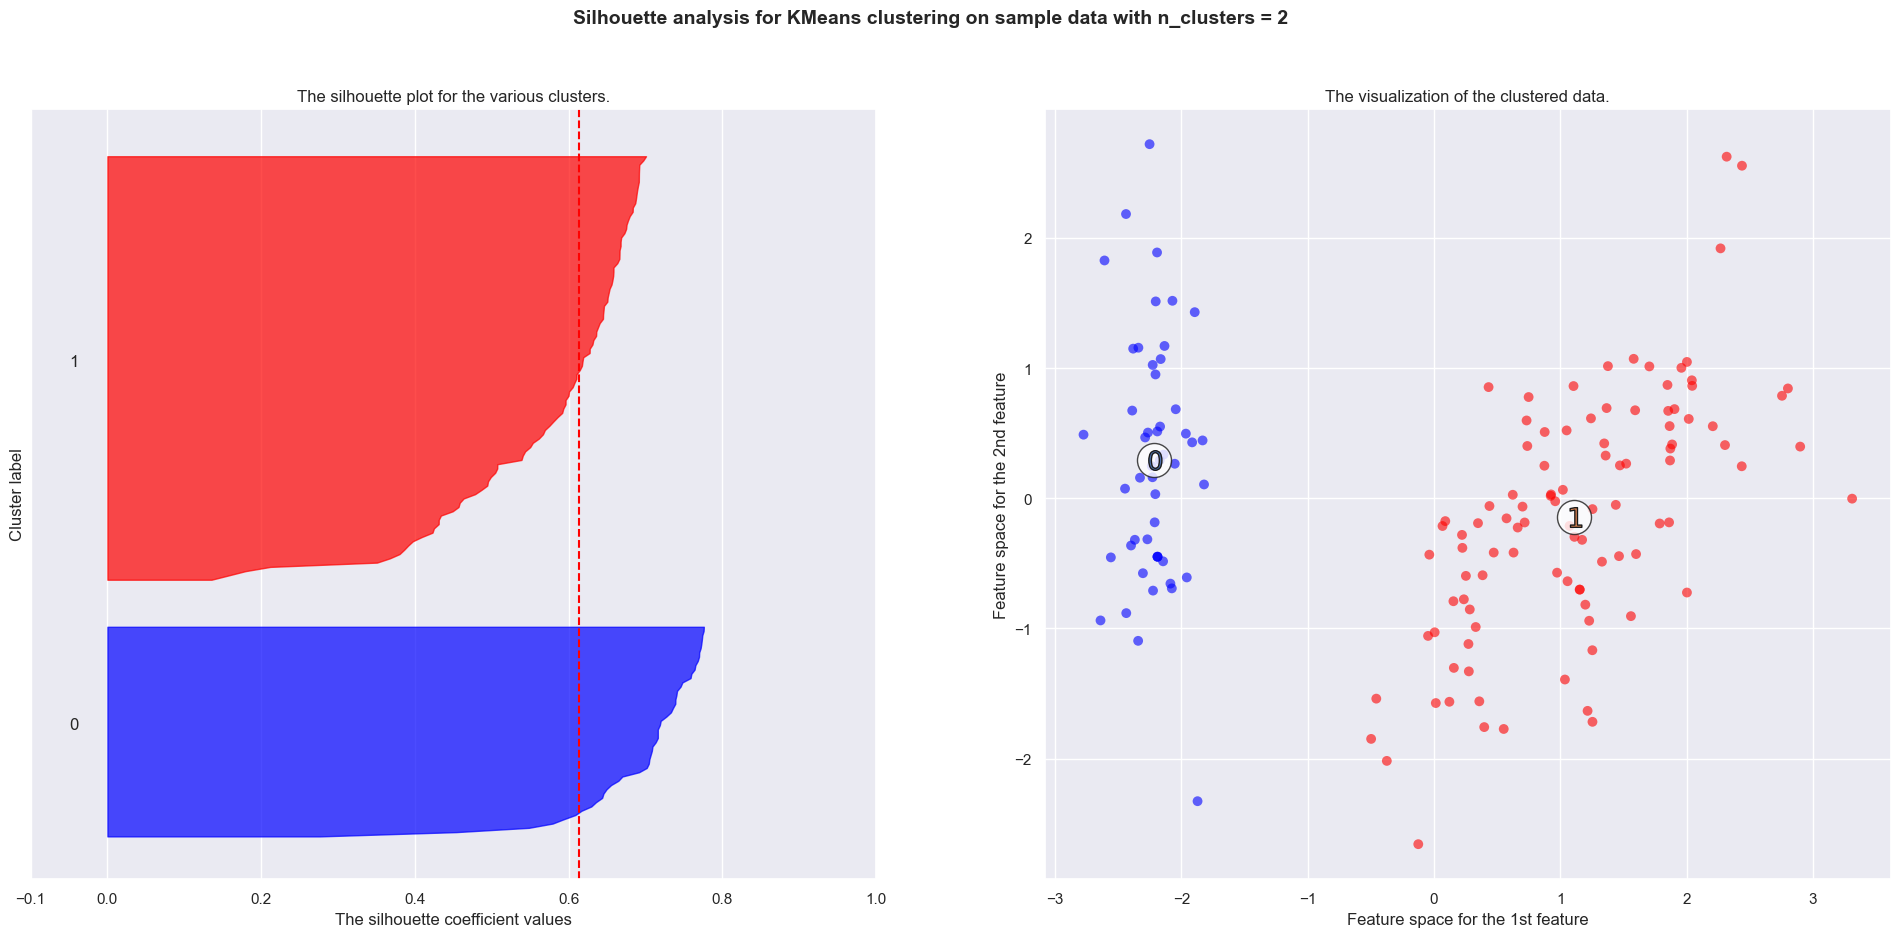

For n_clusters = 3 The average silhouette_score is : 0.5038950147983078


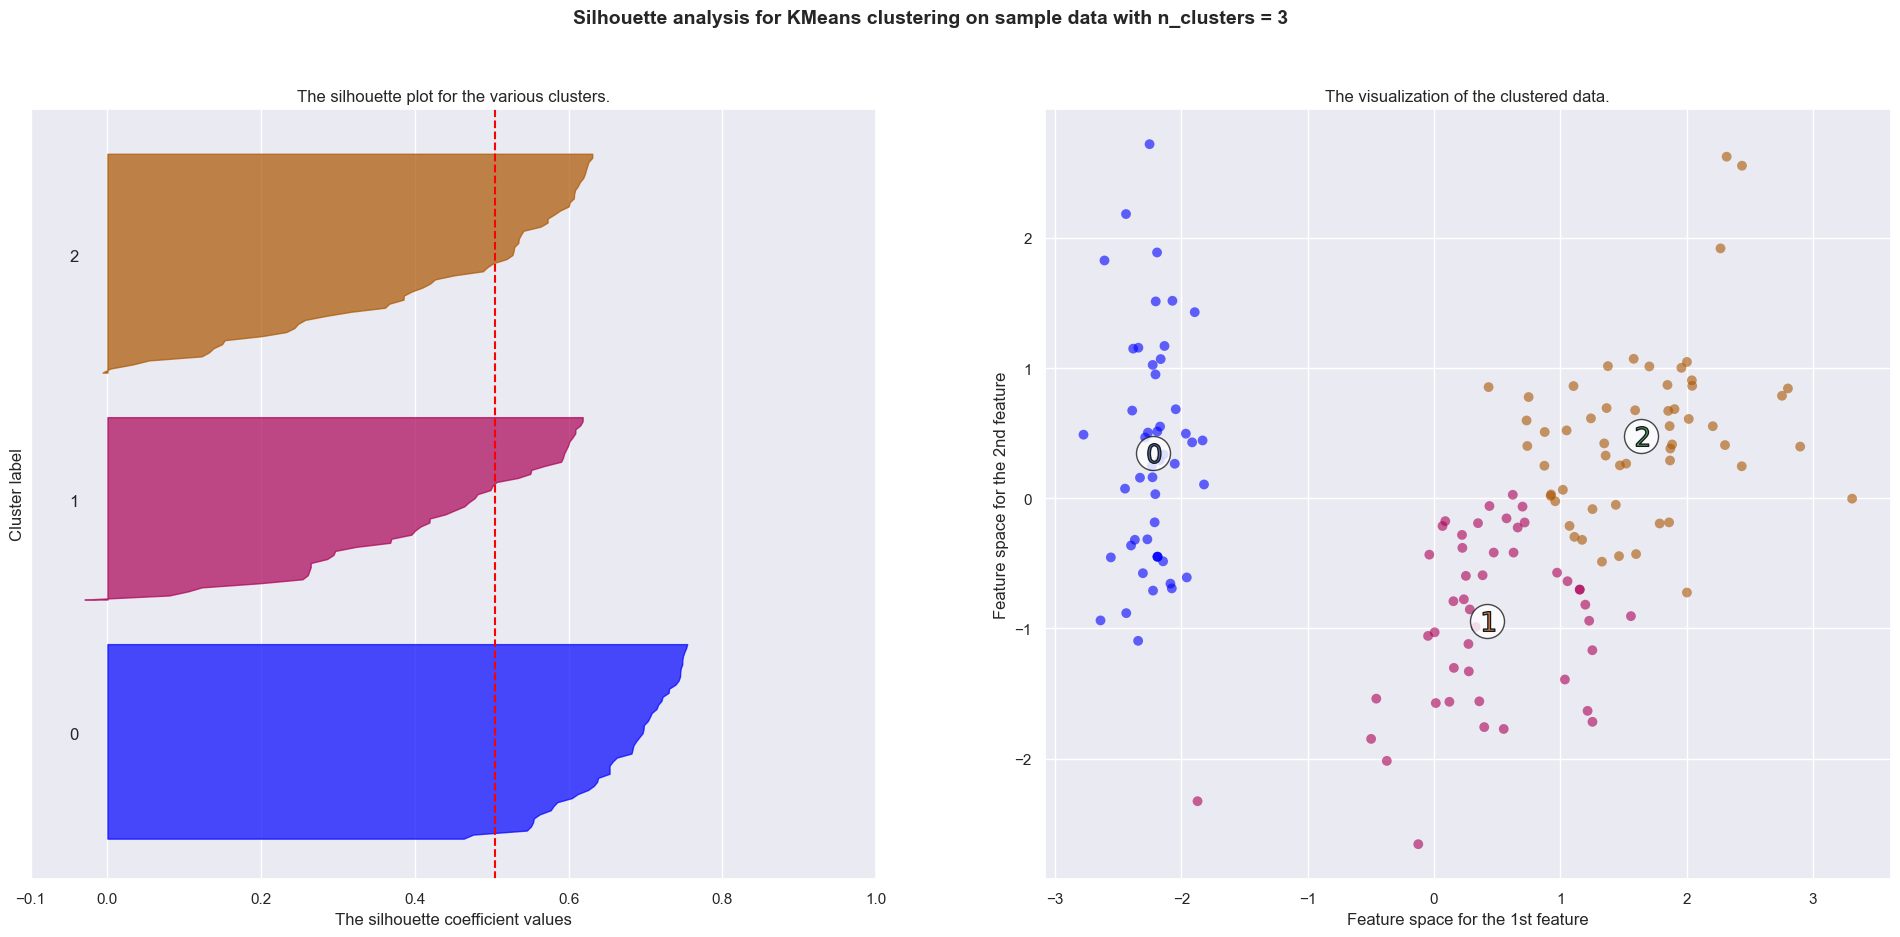

For n_clusters = 4 The average silhouette_score is : 0.4444149016396052


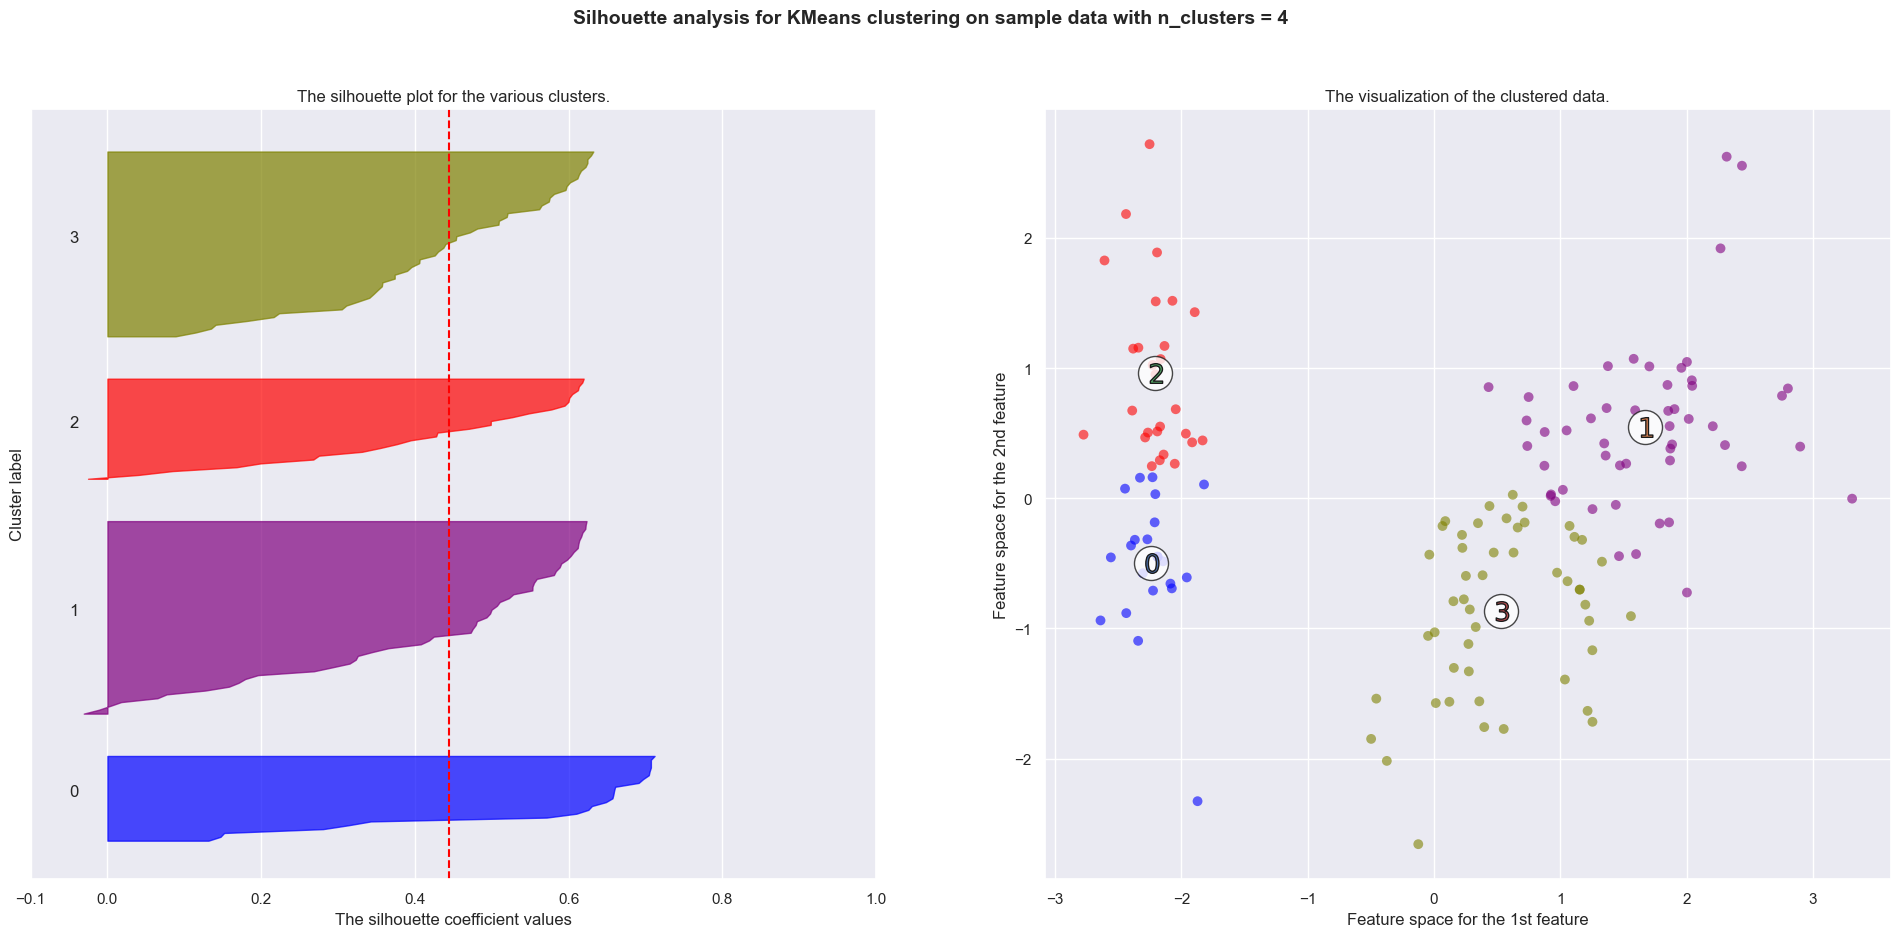

For n_clusters = 5 The average silhouette_score is : 0.41818105966530583


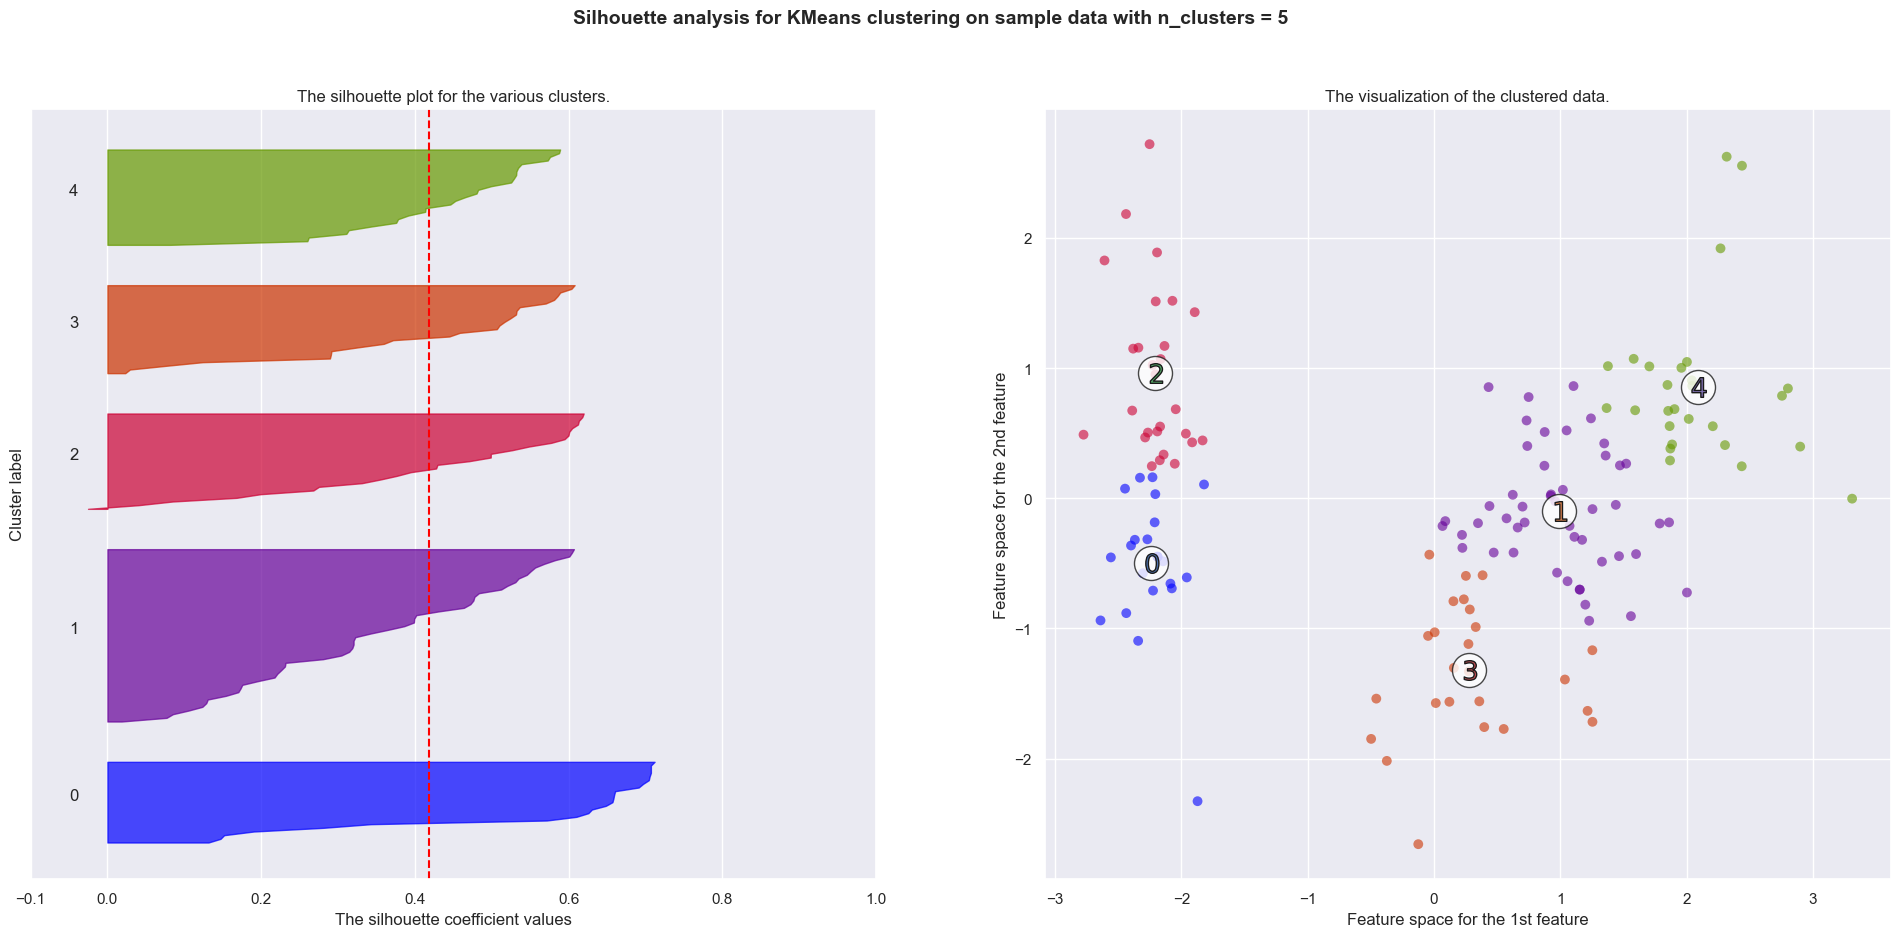

For n_clusters = 6 The average silhouette_score is : 0.4326905315327994


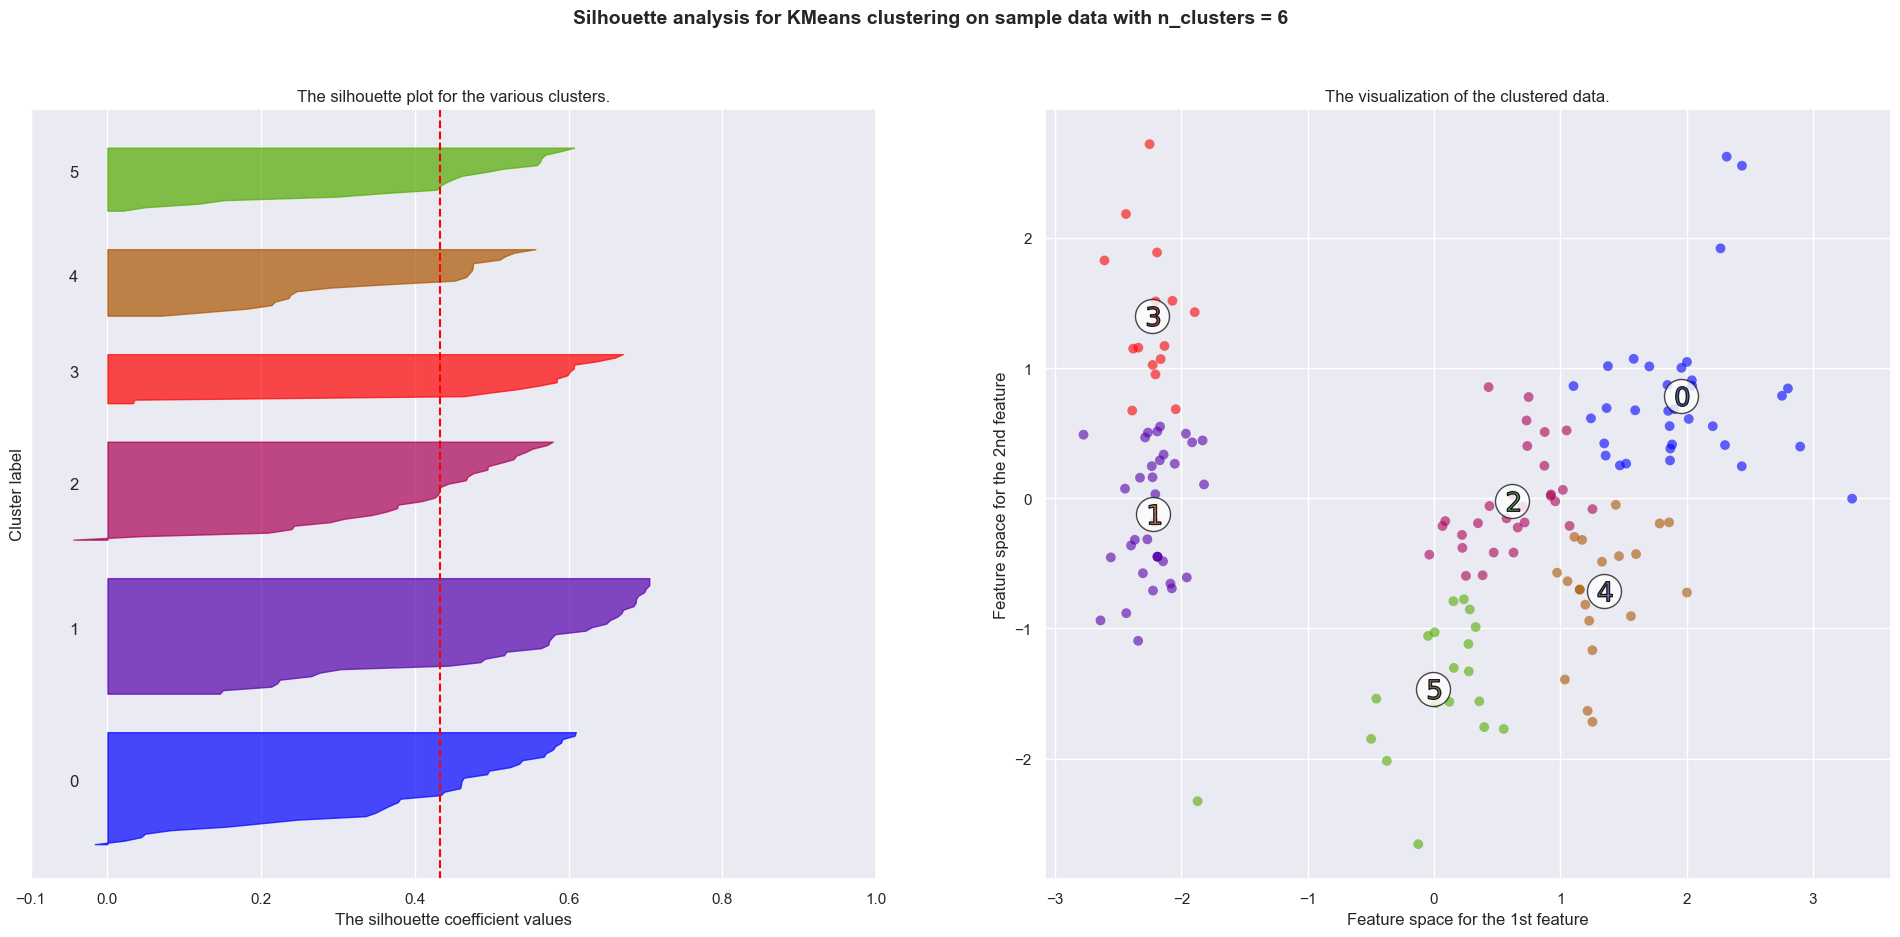

For n_clusters = 7 The average silhouette_score is : 0.42830565049018426


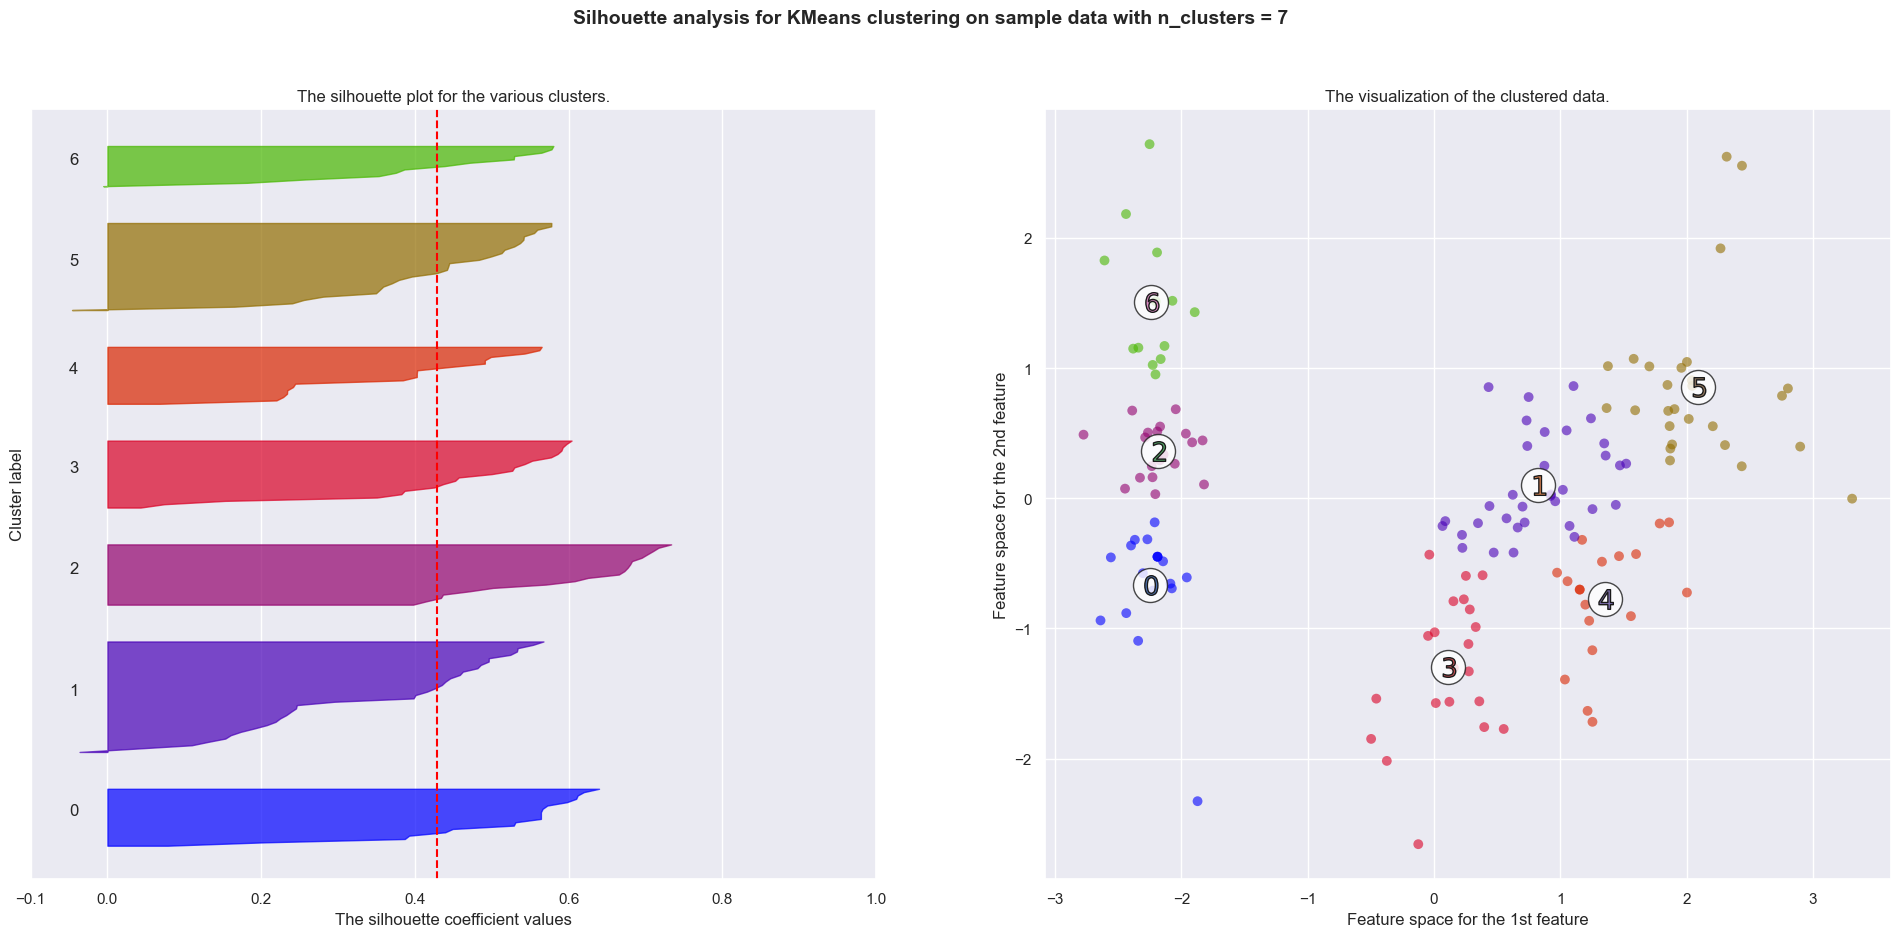

For n_clusters = 8 The average silhouette_score is : 0.44548770062123194


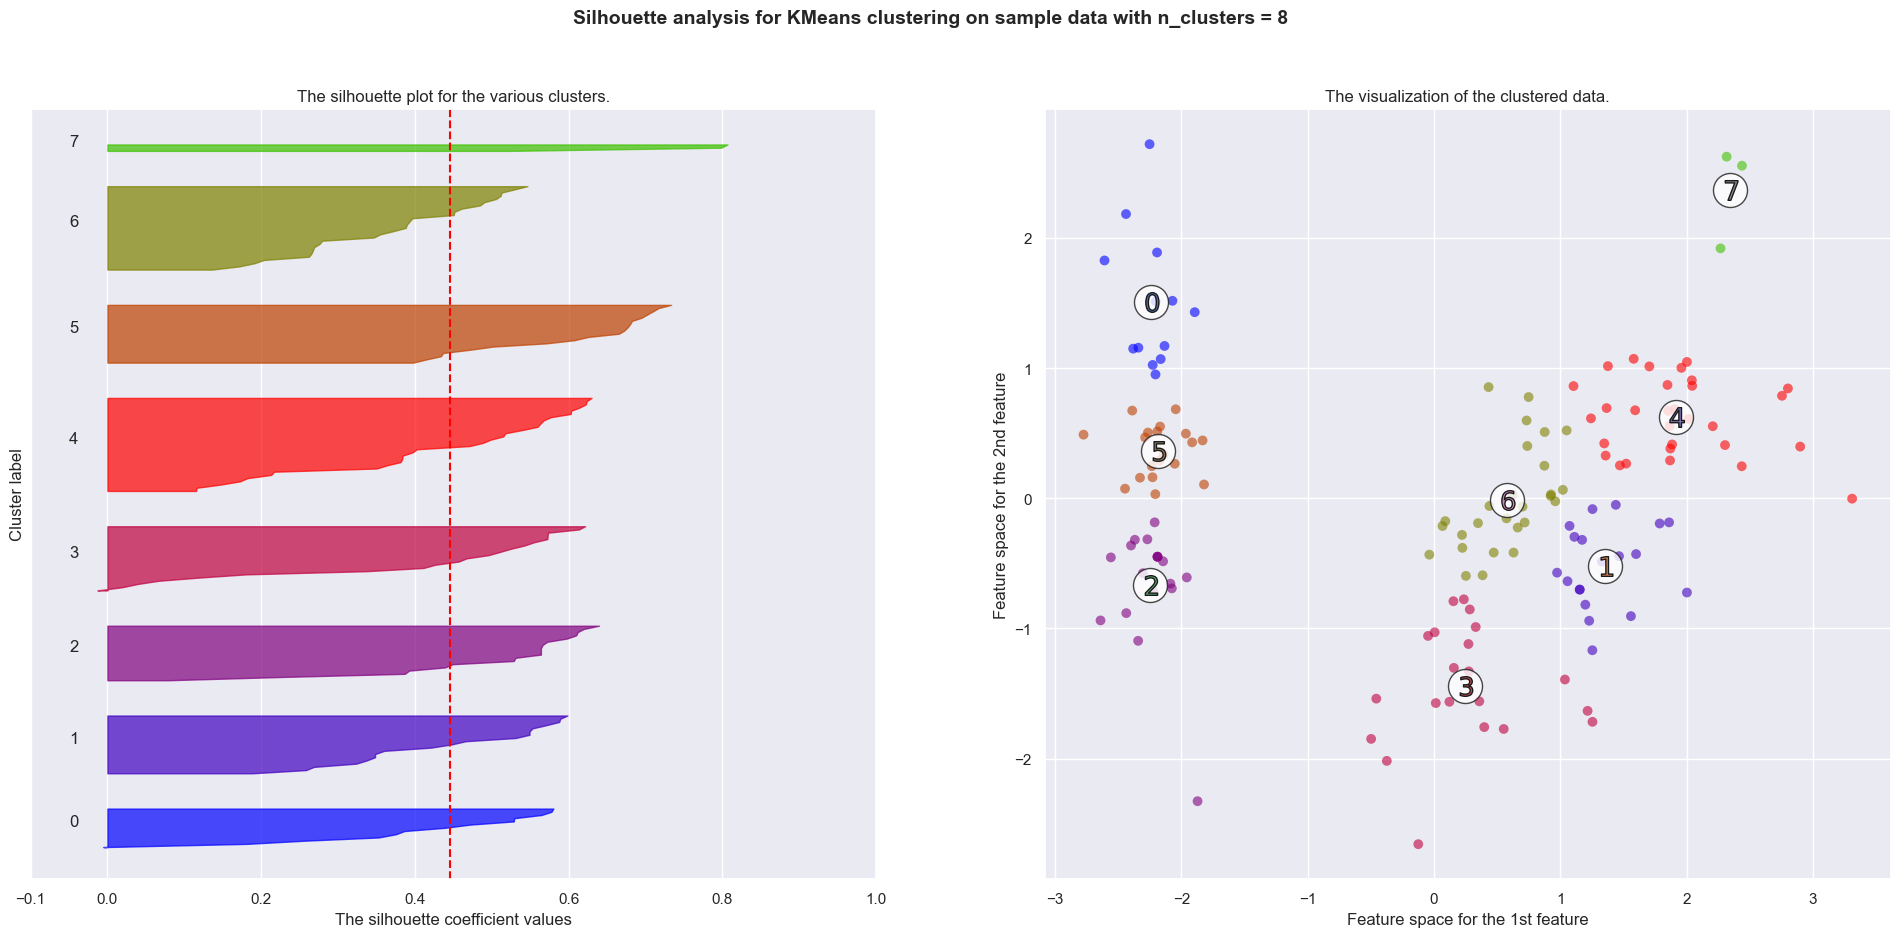

For n_clusters = 9 The average silhouette_score is : 0.4396973436582465


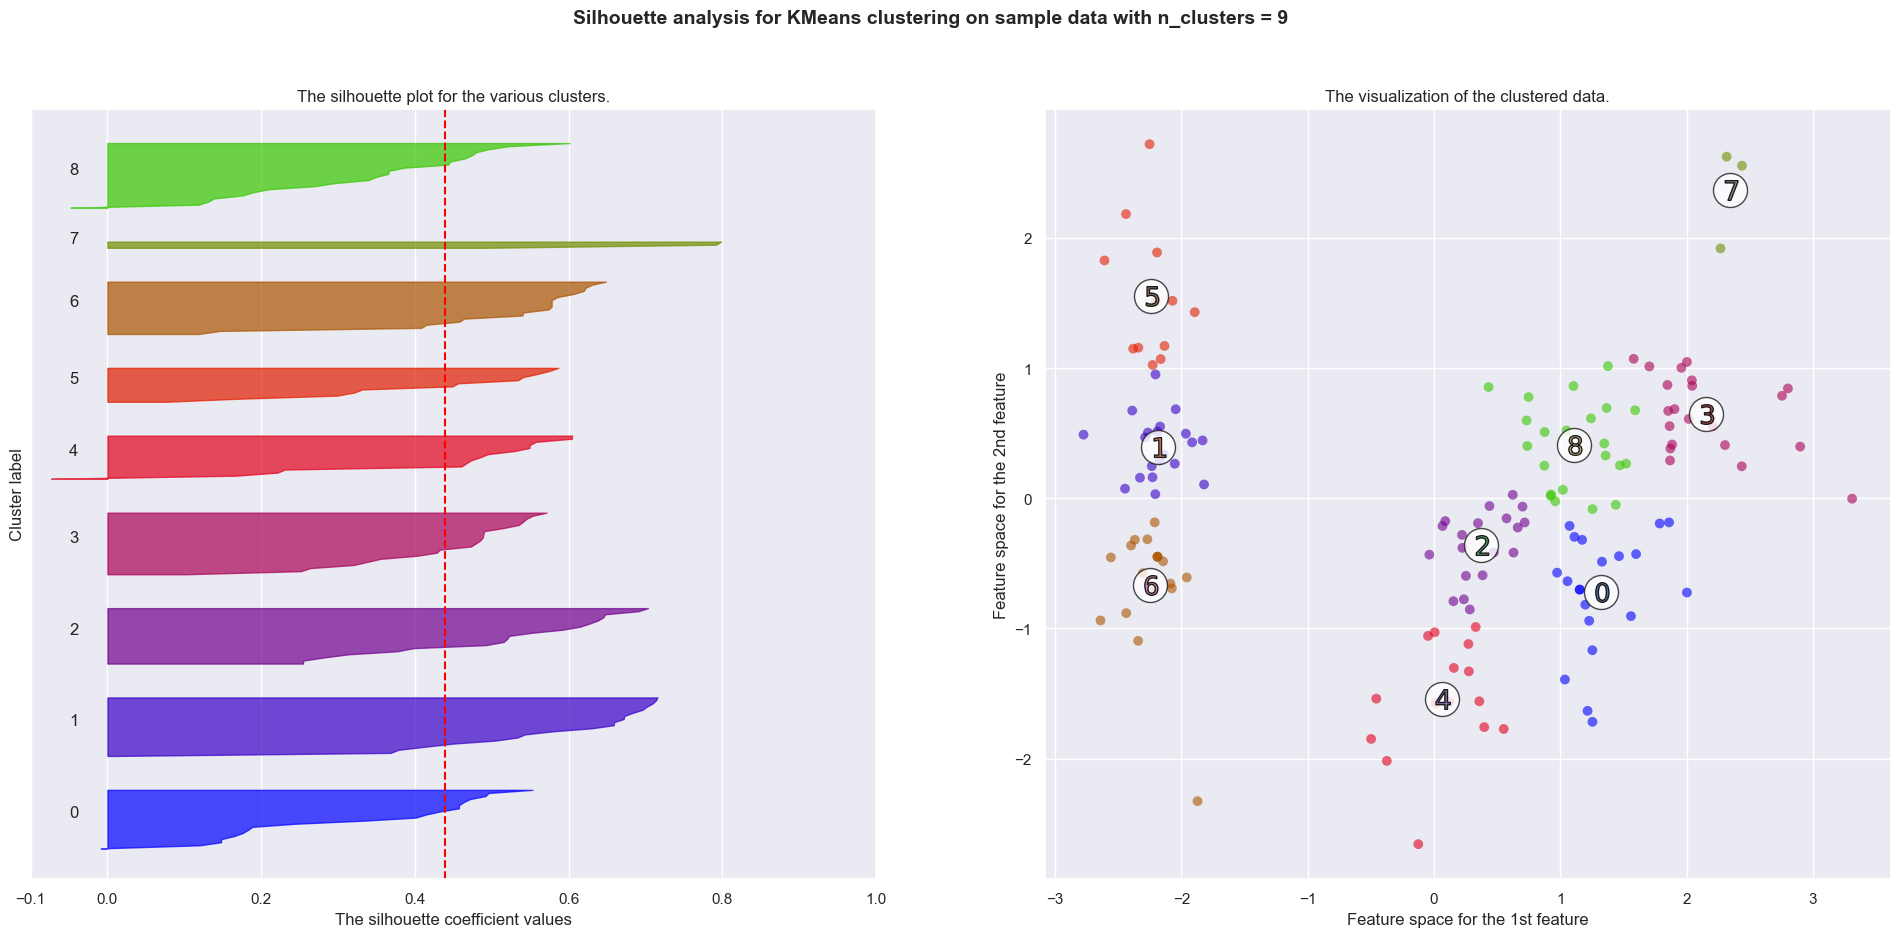

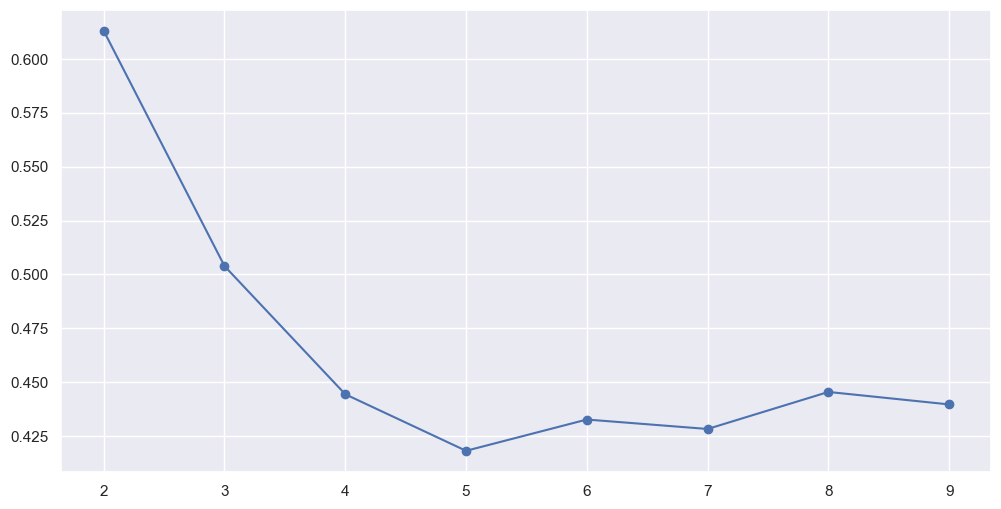

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = dfPCA.iloc[:,[0,1]].values


cmap = cm.get_cmap("brg")
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

silhouettes = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(24, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouettes.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i       
        
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters )

    dim1, dim2 = 0,1
    
    ax2.scatter(X[:, dim1], X[:, dim2], marker='.', s=200, lw=0, alpha=0.6,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, dim1], centers[:, dim2], marker='o',
                c="white", alpha=.8, s=600, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[dim1], c[dim2], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
plt.figure(figsize=(12,6))
plt.plot(range_n_clusters,silhouettes,marker='o')
plt.show()